# Universidad Torcuato DiTella

# Financial Analytics

## TP Final

## Docente

Prof. Pablo Roccatagliata    --  proccatagliata@gmail.com 

## Autores
- Daniela Bessone            -- dsbessone@gmail.com          -- MiM
- Dan Frydman                -- frydmandan@gmail.com         -- MiM
- Agustin Alba Chicar        -- ag.albachicar@gmail.com      -- MiM

## Repositorio

https://github.com/agalbachicar/fa_momentum

## Contenido

- [Analisis exploratorio del dataset](http://localhost:8888/notebooks/src/momentum.ipynb#1.--Realizar-un-an%C3%A1lisis-exploratorio-del-dataset.)
- [Ingenieria de features](http://localhost:8888/notebooks/src/momentum.ipynb#2.--Ingenieria-de-features)
  - [¿Encuentra valores de los features que parecen errores en los datos?](http://localhost:8888/notebooks/src/momentum.ipynb#2.1---%C2%BFNecesita-corregir-valores-faltantes?)
  - [¿Qué preprocesamiento necesitan las variables para los algoritmos de ensamble que va a utilizar?
](http://localhost:8888/notebooks/src/momentum.ipynb#2.2---%C2%BFQu%C3%A9-preprocesamiento-necesitan-las-variables-para-los-algoritmos-de-ensamble-que-va-a-utilizar?)
- [Metalabelling](http://localhost:8888/notebooks/src/momentum.ipynb#3.--Metalabelling)
  - [Momentum con medias de 50 y 200 dias](http://localhost:8888/notebooks/src/momentum.ipynb#3.1--Momentum-con-medias-de-50-y-200-dias)
  - [Predicciones](http://localhost:8888/notebooks/src/momentum.ipynb#3.2--Predicciones)
  - [Obtener el size del bet](http://localhost:8888/notebooks/momentum.ipynb#3.3--Obtener-el-size-del-bet)
  - [Optimizacion del Randon Forest](http://localhost:8888/notebooks/momentum.ipynb#3.5--Optimizacion-del-Random-Forest)
- [Diferenciación fraccionaria](http://localhost:8888/notebooks/momentum.ipynb#3.--Diferenciaci%C3%B3n-Fraccionaria)
  - [Necesidad de la diferenciación fraccionaria](http://localhost:8888/notebooks/momentum.ipynb#3.1--Necesidad-de-Diferenciaci%C3%B3n)
  - [Orden optimo de diferenciación](http://localhost:8888/notebooks/momentum.ipynb#3.2--Orden-%C3%93ptimo-de-Diferenciaci%C3%B3n)
- [Sample weights](http://localhost:8888/notebooks/momentum.ipynb#4--Sample-weights)
  - [¿Tiene sentido ponderar las observaciones?](http://localhost:8888/notebooks/momentum.ipynb#4.1--%C2%BFTiene-sentido-ponderar-las-observaciones?)
  - [¿Cuáles ponderadores utilizaría?](http://localhost:8888/notebooks/momentum.ipynb#4.2--%C2%BFCu%C3%A1les-ponderadores-utilizar%C3%ADa?)
  - [¿Por uniquess?](http://localhost:8888/notebooks/momentum.ipynb#4.3--%C2%BFPor-uniquess?)
  - [¿Por tamaño del retorno?](http://localhost:8888/notebooks/momentum.ipynb#4.4--%C2%BFPor-tama%C3%B1o-del-retorno?)
  - [¿Mejoran los resultados al ponderar?](http://localhost:8888/notebooks/momentum.ipynb#4.3--%C2%BFMejoran-los-resultados-al-ponderar?)
- [Cross validation](http://localhost:8888/notebooks/src/momentum.ipynb#6--Cross-validation)
  - [¿Mejoran los resultados al hacer purged k-fold y embargo en relación a la validación tradicional en series de tiempo?](http://localhost:8888/notebooks/src/momentum.ipynb#6.1--%C2%BFMejoran-los-resultados-al-hacer-purged-k-fold-y-embargo-en-relaci%C3%B3n-a-la-validaci%C3%B3n-tradicional-en-series-de-tiempo?)
  - [¿Esperaría que el shuffle mejore o empeore los resultados sobre el train set?](http://localhost:8888/notebooks/src/momentum.ipynb#6.2--%C2%BFEsperar%C3%ADa-que-el-shuffle-mejore-o-empeore-los-resultados-sobre-el-train-set?)
- [Feature importance](http://localhost:8888/notebooks/src/momentum.ipynb#7.--Feature-importance)
  - [¿Podemos entender qué features son relevantes en el metalabeling?](http://localhost:8888/notebooks/src/momentum.ipynb#7.1--%C2%BFPodemos-entender-qu%C3%A9-features-son-relevantes-en-el-metalabeling?)
    - [Mean decrease in impurity](http://localhost:8888/notebooks/src/momentum.ipynb#7.1.1--Mean-decrease-in-impurity)
    - [Feature permutation](http://localhost:8888/notebooks/src/momentum.ipynb#7.1.2--Feature-permutation)
  - [Puede usar como referencia "Factor Premia and Factor Timing: A Century of Evidence" \(Ilmanen, Israel, Moskowitz, Thapar, and Wang, 2019\) para analizar de qué variables parece depender la performance de momentum.](http://localhost:8888/notebooks/src/momentum.ipynb#7.2--Puede-usar-como-referencia-%22Factor-Premia-and-Factor-Timing:-A-Century-of-Evidence%22-\(Ilmanen,-Israel,-Moskowitz,-Thapar,-and-Wang,-2019\)-para-analizar-de-qu%C3%A9-variables-parece-depender-la-performance-de-momentum
 - [Backtesting](http://localhost:8888/notebooks/momentum.ipynb#8.--Backtesting)
   - [¿Cómo es la performance de su estrategia de momentum con el size óptimo?](http://localhost:8888/notebooks/momentum.ipynb#8.1--%C2%BFC%C3%B3mo-es-la-performance-de-su-estrategia-de-momentum-con-el-size-%C3%B3ptimo?)
   - [¿Logramos superar la performance del ETF MTUM?](http://localhost:8888/notebooks/momentum.ipynb#8.2--%C2%BFLogramos-superar-la-performance-del-ETF-MTUM?)

In [1]:
# %load fintics.py
import datetime
import logging
import matplotlib as mpl
import matplotlib.pyplot as plt
import multiprocessing as mp
import numpy as np
import pandas as pd
import time

from sklearn import datasets
from sklearn.metrics import roc_curve, auc, classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection._split import _BaseKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, BaggingClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

from scipy import interp
from scipy.stats import norm

from itertools import cycle

from statsmodels.tsa.stattools import adfuller

def plot_mtum(df):
  '''
  Crea una figura con dos graficos en columna.
  El grafico de arriba imprime la evolucion del precio de cierre, maximo y minimo de forma diaria.
  El grafico de abajo imprime la evolucion del volumen operado en el dia.
  
  @param df Es el data frame de pandas de donde se extraen los valores.
            Espera que tenga cuatro series completas: 'Close','High', 'Low' y 'Date'.
     
  '''
  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10))
  
  df.plot(kind='line',y='Close', x='Date', color='blue', ax=axes[0])
  df.plot(kind='line',y='High', x='Date', color='green', ax=axes[0])
  df.plot(kind='line',y='Low', x='Date', color='red', ax=axes[0])
  df.plot(kind='line',y='Open', x='Date', color='orange', ax=axes[0])
  plt.title('MTUM prices')

  df.plot(kind='line',y='Volume', x='Date', color='blue', ax=axes[1])
  plt.title('MTUM volume')

  plt.show()

def tick_bars(df, price_column, m):
  '''
  compute tick bars

  # args
      df: pd.DataFrame()
      column: name for price data
      m: int(), threshold value for ticks
  # returns
      idx: list of indices
  '''
  t = df[price_column]
  ts = 0
  idx = []
  for i, x in enumerate(t):
    ts += 1
    if ts >= m:
      idx.append(i)
      ts = 0
      continue
  return idx

def tick_bar_df(df, price_column, m):
  '''
  Filtra `df` por los tick_bars 
  '''
  idx = tick_bars(df, price_column, m)
  return df.iloc[idx].drop_duplicates()

def volume_bars(df, volume_column, m):
  '''
  compute volume bars

  # args
      df: pd.DataFrame()
      volume_column: name for volume data
      m: int(), threshold value for volume
  # returns
      idx: list of indices
  '''
  t = df[volume_column]
  ts = 0
  idx = []
  for i, x in enumerate(t):
    ts += x
    if ts >= m:
      idx.append(i)
      ts = 0
      continue
  return idx

def volume_bar_df(df, volume_column, m):
  idx = volume_bars(df, volume_column, m)
  return df.iloc[idx].drop_duplicates()

def create_dollar_volume_series(df, price_col, volume_col):
  return df[price_col] * df[volume_col]

def dollar_bars(df, dv_column, m):
  '''
  compute dollar bars

  # args
      df: pd.DataFrame()
      dv_column: name for dollar volume data
      m: int(), threshold value for dollars
  # returns
      idx: list of indices
  '''
  t = df[dv_column]
  ts = 0
  idx = []
  for i, x in enumerate(t):
    ts += x
    if ts >= m:
      idx.append(i)
      ts = 0
      continue
  return idx

def dollar_bar_df(df, dv_column, m):
  idx = dollar_bars(df, dv_column, m)
  return df.iloc[idx].drop_duplicates()

def tick_direction(prices):
  '''
  Computa un vector de ticks {1, -1} cuyo signo indica el valor
  del retorno entre dos muestras consecutivas.
  El valor inicial es el mismo que el primero computado.
  El vector de retorno tiene el mismo tamaño que @p prices.
  
  @param prices Es un vector de precios a diferenciar y obtener el signo del retorno.
  @return b_t, un vector de tick imbalance bars.
  '''
  tick_directions = prices.diff()
  tick_directions[0] = tick_directions[1]
  tick_directions = tick_directions.transform(lambda x: np.sign(x))
  return tick_directions

def signed_volume(tick_directions, volumes):
  '''
  Computa una serie de volumenes signados segun el computo de ticks.
  
  @param tick_directions La serie con el signo de del retorno.
  @param volumes La serie de volumenes para cada sample temporal de retorno.
  @return Una serie de volumenes signados, o bien el producto elemento a elemento de
          @p tick_directions con @p volumes.
  '''
  return tick_directions.multiply(volumes)

def exponential_weighted_moving_average(arr_in, window):
  '''
  @see https://stackoverflow.com/a/51392341
  
  Exponentialy weighted moving average specified by a decay ``window``
  assuming infinite history via the recursive form:

      (2) (i)  y[0] = x[0]; and
          (ii) y[t] = a*x[t] + (1-a)*y[t-1] for t>0.

  This method is less accurate that ``_ewma`` but
  much faster:

      In [1]: import numpy as np, bars
         ...: arr = np.random.random(100000)
         ...: %timeit bars._ewma(arr, 10)
         ...: %timeit bars._ewma_infinite_hist(arr, 10)
      3.74 ms ± 60.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
      262 µs ± 1.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

  Parameters
  ----------
  arr_in : np.ndarray, float64
      A single dimenisional numpy array
  window : int64
      The decay window, or 'span'

  Returns
  -------
  np.ndarray
      The EWMA vector, same length / shape as ``arr_in``

  Examples
  --------
  >>> import pandas as pd
  >>> a = np.arange(5, dtype=float)
  >>> exp = pd.DataFrame(a).ewm(span=10, adjust=False).mean()
  >>> np.array_equal(_ewma_infinite_hist(a, 10), exp.values.ravel())
  True
  '''
  n = arr_in.shape[0]
  ewma = np.empty(n, dtype=float)
  alpha = 2 / float(window + 1)
  ewma[0] = arr_in[0]
  for i in range(1, n):
    ewma[i] = arr_in[i] * alpha + ewma[i-1] * (1 - alpha)
  return ewma

def compute_initial_e_v(signed_volumes):
  '''
  Computa el valor absoluto de la media de los volumenes signados.
  Sirve como estimacion del valor inicial de Φ_T para toda la serie de volumenes.
  '''
  return abs(signed_volumes.mean())

def compute_tick_imbalance(signed_volumes, e_t_0, abs_e_v_0):
  '''
  @param signed_volumes Serie de volumenes signados.
  @param e_t_0 El valor inicial de la $E(T)$
  @param abs_e_v_0 El valor absoluto del valor medio (hint) de $Φ_T$.
  @return Una tupla {Ts, abs_thetas, thresholds, i_s} donde:
      Ts: es un vector con los valores de $T$ que se tomaron como largo de ventana de EWMA.
      abs_thetas: es un vector que indica los valores de Φ_T para cada valor de volumen.
      thresholds: es un vector que indica el valor the umbrales que se como para cada valor de volumen.
      i_s: es un vector con los valores de los indices que referencia al vector de volumen con un cambio de tick.
  '''
  Ts, i_s = [], []
  
  # Valores de la iteracion
  # i_prev: valor de indice previo donde se fijo $T$.
  # e_t: $E(T)$ iteracion a iteracion.
  # abs_e_v: $|Φ_T|$ iteracion a iteracion.
  i_prev, e_t, abs_e_v  = 0, e_t_0, abs_e_v_0
  
  n = signed_volumes.shape[0]
  signed_volumes_val = signed_volumes.values.astype(np.float64)
  abs_thetas, thresholds = np.zeros(n), np.zeros(n)
  abs_thetas[0], cur_theta = np.abs(signed_volumes_val[0]), signed_volumes_val[0]
  for i in range(1, n):
    cur_theta += signed_volumes_val[i]
    abs_theta = np.abs(cur_theta)
    abs_thetas[i] = abs_theta
    
    threshold = e_t * abs_e_v
    thresholds[i] = threshold
    
    if abs_theta >= threshold:
      cur_theta = 0
      Ts.append(np.float64(i - i_prev))
      i_s.append(i)
      i_prev = i
      e_t = exponential_weighted_moving_average(np.array(Ts), window=np.int64(len(Ts)))[-1]
      abs_e_v = np.abs(exponential_weighted_moving_average(signed_volumes_val[:i], window=np.int64(e_t_0 * 3))[-1] ) # window of 3 bars
  return Ts, abs_thetas, thresholds, i_s

def compute_ewma(prices, window_size):
  '''
  Computes the EWMA of a price series with a certain window size.
  
  @param prices A pandas series.
  @param window_size EWMA window size.
  @return The EWMA with `window_size` window size of `prices`.
  '''
  return prices.ewm(window_size).mean()

def get_up_cross(fast_ewma, slow_ewma):
  '''
  Computes the fast EWMA serie cross over the slow EWMA serie.
  
  @param fast_ewma A fast EWMA pandas series.
  @param slow_ewma A slow EWMA pandas series.
  @return A filtered version of `fast_ewma` that indicates when the buy trend starts.
  '''
  crit1 = fast_ewma.shift(1) < slow_ewma.shift(1)
  crit2 = fast_ewma > slow_ewma
  return fast_ewma[(crit1) & (crit2)]

def get_down_cross(fast_ewma, slow_ewma):
  '''
  Computes the slow EWMA serie cross over the fast EWMA serie.
  
  @param fast_ewma A fast EWMA pandas series.
  @param slow_ewma A slow EWMA pandas series.
  @return A filtered version of `fast_ewma` that indicates when the sell trend starts.
  '''
  crit1 = fast_ewma.shift(1) > slow_ewma.shift(1)
  crit2 = fast_ewma < slow_ewma
  return fast_ewma[(crit1) & (crit2)]

def create_bet_signal_fast_slow_ewma(df, price_column, fast_window_size, slow_window_size):
  '''
  Computes the buy / sell events based on the 50-200 EWMA cross.
  
  Appends three series to `df`:
  1- FastEWMA : the fast EWMA computed with `fast_window_size`.
  2- SlowEWMA : the fast EWMA computed with `slow_window_size`.
  3- BetEWMA : an integer series with {1, 0, -1} values meaning {Buy, Do nothing, Sell}.
  
  @param df A pandas data frame to extract the price series from.
  @param price_column A string telling the name of the price series.
  @param fast_window_size The fast EWMA window size.
  @param slow_window_size The slow EWMA window size.
  @return `df` with the appended columns.
  '''
  fast_ewma = compute_ewma(df[price_column], fast_window_size)
  slow_ewma = compute_ewma(df[price_column], slow_window_size)
  buy_bet = get_up_cross(fast_ewma, slow_ewma)
  sell_bet = get_down_cross(fast_ewma, slow_ewma)
  
  df['FastEWMA'] = fast_ewma
  df['SlowEWMA'] = slow_ewma
  df['BetEWMA'] = 0
  df.BetEWMA.iloc[buy_bet.index] = 1
  df.BetEWMA.iloc[sell_bet.index] = -1
  return df

def plot_ewma_bet_signals(df):
  f, ax = plt.subplots(figsize=(20,10))

  df.plot(ax=ax, alpha=.5, y='Close', x='Date', color='blue')
  df.plot(ax=ax, alpha=.5, y='FastEWMA', x='Date', color='yellow')
  df.plot(ax=ax, alpha=.5, y='SlowEWMA', x='Date', color='brown')
  df.Close.loc[df.BetEWMA == 1].plot(ax=ax, ls='', marker='^', markersize=7, alpha=0.75, label='Buy', color='green')
  df.Close.loc[df.BetEWMA == -1].plot(ax=ax, ls='', marker='v', markersize=7, alpha=0.75, label='Sell', color='red')
  ax.grid()
  ax.legend()

def getDailyVol(close,span0=100):
    '''
    Computes the daily volatility of price returns.
    It takes a closing price series, applies a diff sample to sample
    (assumes each sample is the closing price), computes an EWM with 
    `span0` samples and then the standard deviation of it.
    
    @param[in] close A series of prices where each value is the closing price of an asset.
    @param[in] span0 The sample size of the EWM.
    @return A pandas series of daily return volatility.
    '''
    df0=close.diff()
    df0=df0 - 1
    df0[0]=0
    df0=df0.ewm(span=100).std().rename('dailyVol')
    df0[0]=df0[1]
    return df0

def getTEvents(close, h):
    '''
    Computes a pandas series of indices of `df[price_col]` that are the output
    of a CUSUM positive and negative filter. The threshold of the filter is `h`.
    
    @param[in] close A series of prices where each value is the closing price of an asset.
    @param[in] h CUSUM filter threshold.
    @return A pandas index series that mark where the CUSUM filter flagged either positive
    and negative cumulative sums that are bigger than `h`.
    '''
    tEvents, sPos, sNeg = [], 0, 0
    diff = close.diff()
    diff[0] = 0
    for i in diff.index:
      sPos, sNeg = max(0, sPos+diff.loc[i]), min(0, sNeg + diff.loc[i])
      if sNeg < -h:
        sNeg = 0
        tEvents.append(i)
      if sPos > h:
        sPos = 0
        tEvents.append(i)
    return pd.Int64Index(tEvents)
    

def addVerticalBarrier(tEvents, close, numDays=1):
    '''
    Returns a filtered pandas series of prices coming from `close` that
    belong to the offset price in `numDays` of `tEvents` prices.
    
    @param[in] tEvents A pandas index series that match the same type of `close`'s index.
    @param[in] close A series of prices where each value is the closing price of an asset.
    @param[in] numDays A delta in samples to apply to all a vertical barrier.
    @return A pandas series of prices. 
    '''
    t1=close.index.searchsorted(tEvents + numDays)
    t1=t1[t1<close.shape[0]]
    t1=(pd.Series(close.index[t1],index=tEvents[:t1.shape[0]]))
    return t1

def applyPtSlOnT1(close,events,ptSl,molecule):
    '''
    Apply stop loss/profit taking, if it takes place before t1 (end of event)
    
    @param[in] close A pandas series of prices.
    @param[in] events A pandas dataframe, with columns:
      - `t1`:  the timestamp of vertical barries. When the value is np.nan, there will not be a vertical barrier.
      - `trgt`: the unit width of the horizontal barriers.
    @param[in] ptSl A list of two non-negative float values:
      - `ptSl[0]`: the factor that multiplies `trgt` to set the width of the upper barrier. If 0, there will not be an upper barrier.
      - `ptSl[1]`: the factor that multiplies `trgt` to set the width of the lower barrier. If 0, there will not be an lower barrier.
    @param[in] molecule  A list with the subset of event indices that will be processed by a single thread.
    '''
    events_=events.loc[molecule]
    out=events_[['t1']].copy(deep=True)
    if ptSl[0]>0: pt=ptSl[0]*events_['trgt']
    else: pt=pd.Series(index=events.index) # NaNs
    if ptSl[1]>0: sl=-ptSl[1]*events_['trgt']
    else: sl=pd.Series(index=events.index) # NaNs
    for loc,t1 in events_['t1'].fillna(close.index[-1]).iteritems():
      loc = int(loc)
      t1 = int(t1)
      df0=close[loc:t1] # path prices
      df0=(df0/close[loc]-1)*events_.at[loc,'side'] # path returns
      out.loc[loc,'sl']=df0[df0<sl[loc]].index.min() # earliest stop loss
      out.loc[loc,'pt']=df0[df0>pt[loc]].index.min() # earliest profit taking
    return out

def getEvents(close, tEvents, ptSl, trgt, minRet, t1=False, side=None):
    #1) get target
    trgt=trgt.loc[tEvents]
    trgt=trgt[trgt>minRet] # minRet
    #2) get t1 (max holding period)
    if t1 is False:t1=pd.Series(pd.NaT, index=tEvents)
    #3) form events object, apply stop loss on t1
    if side is None:side_,ptSl_=pd.Series(1.,index=trgt.index), [ptSl[0],ptSl[0]]
    else: side_,ptSl_=side.loc[trgt.index],ptSl[:2]
    events=(pd.concat({'t1':t1,'trgt':trgt,'side':side_}, axis=1)
            .dropna(subset=['trgt']))
    df0=applyPtSlOnT1(close, events, ptSl_, events.index)
    events['t1']=df0.dropna(how='all').min(axis=1) # pd.min ignores nan
    if side is None:events=events.drop('side',axis=1)
    return events
    
def getBins(events, close):
    '''
    Compute event's outcome (including side information, if provided).
    events is a DataFrame where:
    -events.index is event's starttime
    -events['t1'] is event's endtime
    -events['trgt'] is event's target
    -events['side'] (optional) implies the algo's position side
    Case 1: ('side' not in events): bin in (-1,1) <-label by price action
    Case 2: ('side' in events): bin in (0,1) <-label by pnl (meta-labeling)
    '''
    #1) prices aligned with events
    events_=events.dropna(subset=['t1'])
    px=events_.index.union(events_['t1'].values).drop_duplicates()
    px=close.reindex(px,method='bfill')
    #2) create out object
    out=pd.DataFrame(index=events_.index)
    out['ret']=px.loc[events_['t1'].values].values/px.loc[events_.index]-1
    if 'side' in events_:out['ret']*=events_['side'] # meta-labeling
    out['bin']=np.sign(out['ret'])
    if 'side' in events_:out.loc[out['ret']<=0,'bin']=0 # meta-labeling
    return out

def getBinsNew(events, close, t1=None):
    '''
    Compute event's outcome (including side information, if provided).
    events is a DataFrame where:
    -events.index is event's starttime
    -events['t1'] is event's endtime
    -events['trgt'] is event's target
    -events['side'] (optional) implies the algo's position side
    -t1 is original vertical barrier series
    Case 1: ('side' not in events): bin in (-1,1) <-label by price action
    Case 2: ('side' in events): bin in (0,1) <-label by pnl (meta-labeling)
    '''
    #1) prices aligned with events
    events_=events.dropna(subset=['t1'])
    px=events_.index.union(events_['t1'].values).drop_duplicates()
    px=close.reindex(px,method='bfill')
    #2) create out object
    out=pd.DataFrame(index=events_.index)
    out['ret']=px.loc[events_['t1'].values].values/px.loc[events_.index]-1
    if 'side' in events_:out['ret']*=events_['side'] # meta-labeling
    out['bin']=np.sign(out['ret'])
    
    if 'side' not in events_:
      # only applies when not meta-labeling
      # to update bin to 0 when vertical barrier is touched, we need the original
      # vertical barrier series since the events['t1'] is the time of first 
      # touch of any barrier and not the vertical barrier specifically. 
      # The index of the intersection of the vertical barrier values and the 
      # events['t1'] values indicate which bin labels needs to be turned to 0
      vtouch_first_idx = events[events['t1'].isin(t1.values)].index
      out.loc[vtouch_first_idx, 'bin'] = 0.
    
    if 'side' in events_:out.loc[out['ret']<=0,'bin']=0 # meta-labeling
    return out

def getRandomForest(n_estimator=150, oob_score=False, max_samples=None):
  return RandomForestClassifier(max_depth=2, n_estimators=n_estimator, criterion='entropy', class_weight='balanced_subsample', random_state=RANDOM_STATE, oob_score=oob_score, max_samples=max_samples)

def plotROC(y_test, y_pred_rf):
  fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_rf, tpr_rf, label='RF')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

def train_test_samples(events, labels, test_size, binarize = False):
  X = events_side.dropna().values.reshape(-1,1)
  y = labels.bin.values
  if binarize: y = label_binarize(y, [-1, 0, 1])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
  return X, y, X_train, X_test, y_train, y_test


def getSignal(events, stepSize, prob, pred, numClasses, **kargs):
  if prob.shape[0] == 0: return pd.Series()
  signal0 = (prob - 1. / numClasses) / (prob * (1. - prob)) ** 0.5
  signal0 = pred * (2. * norm.cdf(signal0) - 1.)
  return signal0
  # if 'side' in events: signal0*=events.loc[signal0.index, 'side']
  # df0 = signal0.to_frame('signal').join(events[['t1']], how='left')
  # df0 = avgActiveSignals(df0)
  # signal1 = discreteSignal(signal0=pd.Series(signal0), stepSize=stepSize)
  # return signal1

def avgActiveSignals(signals):
  tPnts = set(signals['t1'].dropna().values)
  tPnts = tPnts.union(signals.index.values)
  tPnts = list(tPnts); tPnts.sort()
  out = mpAvgActiveSignals(signals, ('molecule', tPnts))
  return out

def mpAvgActiveSignals(signals, molecule):
  out = pd.Series()
  for loc in molecule:
    df0 = (signals.index.values <= loc) & ((loc < signals['t1']) | pd.isnull(signals['t1']))
    act = signals[df0].index
    if len(act) > 0: out[loc] = signals.loc[act, 'signal'].mean()
    else: out[loc] = 0
  return out

def discreteSignal(signal0, stepSize):
  signal1 = (signal0 / stepSize).round() * stepSize
  signal1[signal1 > 1] = 1
  signal1[signal1 < 1] = -1
  return signal1

def getOptimizedRandomForest(max_samples=None, oob_score=False):
    n_estimators = [50, 100, 150, 300]
    max_depth = [2, 3, 4,]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [2, 3, 5,]
    n_iter = 100

    grid_params = {'n_estimators': n_estimators,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
    if RUN_RANDOM_FOREST_OPTIMIZATION:
      random_forest_classifier = RandomForestClassifier(random_state=RANDOM_STATE, oob_score=oob_score, max_samples=max_samples)
      return RandomizedSearchCV(estimator = random_forest_classifier, param_distributions=grid_params, n_iter=n_iter, cv=CV, verbose=2, random_state=RANDOM_STATE**2, n_jobs=-1)
    return getRandomForest(n_estimator=150, oob_score=oob_score, max_samples=max_samples)

def getWeights(d,size):
  # thres>0 drops insignificant weights
  w=[1.]
  for k in range(1,size):
    w_=-w[-1]/k*(d-k+1)
    w.append(w_)
  w=np.array(w[::-1]).reshape(-1,1)
  return w

def plotWeights(dRange,nPlots,size):
  w=pd.DataFrame()
  for d in np.linspace(dRange[0],dRange[1],nPlots):
    w_=getWeights(d,size=size)
    w_=pd.DataFrame(w_,index=range(w_.shape[0])[::-1],columns=[d])
    w=w.join(w_,how='outer')
  ax=w.plot()
  ax.legend(loc='upper left');mpl.show()
  return

def plotWeights_FFD(dRange,nPlots,thres):
  w=pd.DataFrame()
  for d in np.linspace(dRange[0],dRange[1],nPlots):
    w_=getWeights_FFD(d,thres=thres)
    w_=pd.DataFrame(w_,index=range(w_.shape[0])[::-1],columns=[d])
    w=w.join(w_,how='outer')
  ax=w.plot()
  ax.legend(loc='upper left');mpl.show()
  return

def getWeights_FFD(d, thres):
  w, k = [1.0], 1
  while True:
    w_ = -w[-1] / k * (d - k + 1)
    if abs(w_) < thres:
        break
    w.append(w_)
    k += 1
  return np.array(w[::-1]).reshape(-1, 1)


def fracDiff_FFD(series, d, thres=1e-5):
  # Constant width window (new solution)
  #Note 1: thres determines the cut-off weight for the window
  #Note 2: d can be any positive fractional, not necessarily bounded [0,1]
  
  #1) Compute weights for the longest series
  w =  getWeights_FFD(d, thres)
  width, df = len(w) - 1, {}
  
  #2) Apply weights to values
  for name in series.columns:
    seriesF, df_ = series[[name]].fillna(method='ffill').dropna(), pd.Series(index=series.index)
    for iloc1 in range(width, seriesF.shape[0]):
      loc0, loc1 = seriesF.index[iloc1 - width], seriesF.index[iloc1]
      if not np.isfinite(series.loc[loc1, name]):
        continue # exclude NAs
      df_[loc1] = np.dot(w.T, seriesF.loc[loc0:loc1])[0, 0]
    df[name] = df_.copy(deep=True)
  df = pd.concat(df, axis=1)
  return df

def plotMinFFD(close, threshold, testMinFFDFileName = None):
  out= pd.DataFrame(columns=['adfStat','pVal','lags','nObs','95% conf','corr'])
  df0= close
  for d in np.linspace(0,1,21):
    df1=np.log(df0).resample('1D').last().dropna() # downcast to daily obs. Dropped NAs
    df2=fracDiff_FFD(df1, d, thres=threshold).dropna()
    corr=np.corrcoef(df1.loc[df2.index,'Close'],df2['Close'])[0,1]
    df2=adfuller(df2['Close'],maxlag=1,regression='c',autolag=None)
    out.loc[d]=list(df2[:4])+[df2[4]['5%']]+[corr] # with critical value
  if testMinFFDFileName is not None: out.to_csv(testMinFFDFileName)
  out[['adfStat','corr']].plot(secondary_y='adfStat')
  mpl.pyplot.axhline(out['95% conf'].mean(),linewidth=1,color='r',linestyle='dotted')
  #mpl.savefig(path+instName+'_testMinFFD.png')
  return out

def evaluate(X,y,clf):
  # The random forest model by itself
  y_pred_rf = clf.predict_proba(X)[:, 1]
  y_pred = clf.predict(X)
  fpr_rf, tpr_rf, _ = roc_curve(y, y_pred_rf)
  print(classification_report(y, y_pred))

  plt.figure(figsize=(9,6))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_rf, tpr_rf, label='clf')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()
    
    
def evaluate_multi(X_test, y_test, fit, n_classes=3):
  """
  adapted from:
      https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
  """
  print(classification_report(y_test, fit.predict(X_test)))
  
  try:
    y_score = fit.decision_function(X_test)
  except:
    y_score = fit.predict_proba(X_test)
      
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(figsize=(12,8))
  plt.plot(fpr["micro"], tpr["micro"],
           label='micro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["micro"]),
           color='deeppink', linestyle=':', linewidth=4)

  plt.plot(fpr["macro"], tpr["macro"],
           label='macro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["macro"]),
           color='navy', linestyle=':', linewidth=4)

  lw=2
  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Multiclass Bins')
  plt.legend(loc="lower right")
  plt.show()

def mpNumCoEvents(closeIdx,t1,molecule):
  '''
  Compute the number of concurrent events per bar.
  +molecule[0] is the date of the first event on which the weight will be computed
  +molecule[-1] is the date of the last event on which the weight will be computed
  
  Any event that starts before t1[modelcule].max() impacts the count.
  '''
  #1) find events that span the period [molecule[0],molecule[-1]]
  t1=t1.fillna(closeIdx[-1]) # unclosed events still must impact other weights
  t1=t1[t1>=molecule[0]] # events that end at or after molecule[0]
  t1=t1.loc[:t1[molecule].max()] # events that start at or before t1[molecule].max()
  #2) count events spanning a bar
  iloc=closeIdx.searchsorted(np.array([t1.index[0],t1.max()]))
  count=pd.Series(0,index=closeIdx[iloc[0]:iloc[1]+1])
  for tIn,tOut in t1.iteritems():count.loc[tIn:tOut]+=1.
  return count.loc[molecule[0]:t1[molecule].max()]

def mpSampleTW(t1,numCoEvents,molecule):
  # Derive avg. uniqueness over the events lifespan
  wght=pd.Series(index=molecule)
  for tIn,tOut in t1.loc[wght.index].iteritems():
    wght.loc[tIn]=(1./numCoEvents.loc[tIn:tOut]).mean()
  return wght

def getIndMatrix(barIx,t1):
  # Get Indicator matrix
  indM=(pd.DataFrame(0,index=barIx,columns=range(t1.shape[0])))
  for i,(t0,t1) in enumerate(t1.iteritems()):indM.loc[t0:t1,i]=1.
  return indM

def getAvgUniqueness(indM):
  c=indM.sum(axis=1)
  u=indM.div(c, axis=0)
  avgU=u[u>0].mean()
  return avgU

def seqBootstrap(indM, sLength=None):
  if sLength is None: sLength = indM.shape[1]
  phi = []
  while len(phi) < sLength:
    avgU = pd.Series()
    for i in indM:
      indM_ = indM[phi+[i]]
      avgU.loc[i] = getAvgUniqueness(indM_).iloc[-1]
    prob = avgU / avgU.sum()
    phi += [np.random.choice(indM.columns, p=prob)]
  return phi

def getAvgUniqueness(indM):
  # Average uniqueness from indicator matrix
  c=indM.sum(axis=1) # concurrency
  u=indM.div(c,axis=0) # uniqueness
  avgU=u[u>0].mean() # avg. uniqueness
  return avgU

def seqBootstrap(indM,sLength=None):
  # Generate a sample via sequential bootstrap
  if sLength is None:sLength=indM.shape[1]
  phi=[]
  while len(phi)<sLength:
    avgU=pd.Series()
    for i in indM:
      indM_=indM[phi+[i]] # reduce indM
      avgU.loc[i]=getAvgUniqueness(indM_).iloc[-1]
    prob=avgU/avgU.sum() # draw prob
    phi+=[np.random.choice(indM.columns,p=prob)]
  return phi

def mpSampleW(t1, numCoEvents, close, molecule):
  # Derive sample weight by return attribution
  ret=np.log(close).diff() # log-returns, so that they are additive
  wght=pd.Series(index=molecule)
  for tIn,tOut in t1.loc[wght.index].iteritems():
      wght.loc[tIn]=(ret.loc[tIn:tOut]/numCoEvents.loc[tIn:tOut]).sum()
  return wght.abs()

def getTimeDecay(tW,clfLastW=1.):
  # apply piecewise-linear decay to observed uniqueness (tW)
  # newest observation gets weight=1, oldest observation gets weight=clfLastW
  clfW=tW.sort_index().cumsum()
  if clfLastW>=0: slope=(1.-clfLastW)/clfW.iloc[-1]
  else: slope=1./((clfLastW+1)*clfW.iloc[-1])
  const=1.-slope*clfW.iloc[-1]
  clfW=const+slope*clfW
  clfW[clfW<0]=0
  return clfW

def getTrainTimes(t1,testTimes):
  """
  Given testTimes, find the times of the training observations
  -t1.index: Time when the observation started
  -t1.value: Time when the observation ended
  -testTimes: Times of testing observations
  """
  trn=t1.copy(deep=True)
  for i,j in testTimes.iteritems():
    df0=trn[(i<=trn.index)&(trn.index<=j)].index # train starts within test
    df1=trn[(i<=trn)&(trn<=j)].index # train ends within test
    df2=trn[(trn.index<=i)&(j<=trn)].index # train envelops test
    trn=trn.drop(df0.union(df1).union(df2))
  return trn


def getEmbargoTimes(times,pctEmbargo):
  # Get embargo time for each bar
  step=int(times.shape[0]*pctEmbargo)
  if step==0:
    mbrg=pd.Series(times,index=times)
  else:
    mbrg=pd.Series(times[step:],index=times[:-step])
    mbrg=mbrg.append(pd.Series(times[-1],index=times[-step:]))
  return mbrg

class PurgedKFold(_BaseKFold):
  """
  Extend KFold class to work with labels that span intervals
  The train is purged of observations overlapping test-label intervals
  Test set is assumed contiguous (shuffle=False), w/o training samples in between
  """
  def __init__(self,n_splits=3,t1=None,pctEmbargo=0.):
    if not isinstance(t1,pd.Series):
      raise ValueError('Label Through Dates must be a pd.Series')
    super(PurgedKFold,self).__init__(n_splits,shuffle=False,random_state=None)
    self.t1=t1
    self.pctEmbargo=pctEmbargo
      
  def split(self,X,y=None,groups=None):
    if (X.index==self.t1.index).sum()!=len(self.t1):
      raise ValueError('X and ThruDateValues must have the same index')
    indices=np.arange(X.shape[0])
    mbrg=int(X.shape[0]*self.pctEmbargo)
    test_starts=[(i[0],i[-1]+1) for i in np.array_split(np.arange(X.shape[0]), self.n_splits)]
    for i,j in test_starts:
      t0=self.t1.index[i] # start of test set
      test_indices=indices[i:j]
      maxT1Idx=self.t1.index.searchsorted(self.t1.index[test_indices].max())
      train_indices=self.t1.index.searchsorted(self.t1[self.t1<=t0].index)
      if maxT1Idx<X.shape[0]: # right train (with embargo)
        train_indices=np.concatenate((train_indices, indices[maxT1Idx+mbrg:]))
      yield train_indices,test_indices
            

def cvScore(clf,X,y,sample_weight,scoring='neg_log_loss',
            t1=None,cv=None,cvGen=None,pctEmbargo=None):
  if scoring not in ['neg_log_loss','accuracy']:
      raise Exception('wrong scoring method.')
  idx = pd.IndexSlice
  if cvGen is None:
    cvGen=PurgedKFold(n_splits=cv,t1=t1,pctEmbargo=pctEmbargo) # purged
  score=[]
  for train,test in cvGen.split(X=X):
    fit=clf.fit(X=X.iloc[idx[train],:],y=y.iloc[idx[train]],
                sample_weight=sample_weight.iloc[idx[train]].values)
    if scoring=='neg_log_loss':
      prob=fit.predict_proba(X.iloc[idx[test],:])
      score_=-log_loss(y.iloc[idx[test]], prob,
                              sample_weight=sample_weight.iloc[idx[test]].values,
                              labels=clf.classes_)
    else:
      pred=fit.predict(X.iloc[idx[test],:])
      score_=accuracy_score(y.iloc[idx[test]],pred,
                            sample_weight=sample_weight.iloc[idx[test]].values)
    score.append(score_)
  return np.array(score)

def crossValPlot(skf,classifier,X_,y_):
  X = np.asarray(X_)
  y = np.asarray(y_)
  
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  
  f,ax = plt.subplots(figsize=(10,7))
  i = 0
  for train, test in skf.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
           label='Luck', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
           label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
           lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                   label=r'$\pm$ 1 std. dev.')

  ax.set_xlim([-0.05, 1.05])
  ax.set_ylim([-0.05, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('Receiver operating characteristic example')
  ax.legend(bbox_to_anchor=(1,1))
    
def crossValPlot2(skf,classifier,X,y):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  idx = pd.IndexSlice
  f,ax = plt.subplots(figsize=(10,7))
  i = 0
  for train, test in skf.split(X, y):
    probas_ = (classifier.fit(X.iloc[idx[train]], y.iloc[idx[train]])
               .predict_proba(X.iloc[idx[test]]))
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[idx[test]], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ax.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
           label='Luck', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
           label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
           lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                   label=r'$\pm$ 1 std. dev.')

  ax.set_xlim([-0.05, 1.05])
  ax.set_ylim([-0.05, 1.05])
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title('Receiver operating characteristic example')
  ax.legend(bbox_to_anchor=(1,1))

def featImpMDI(fit, featNames):
  df0={i:tree.feature_importances_ for i, tree in enumerate(fit.estimators_)}
  df0=pd.DataFrame.from_dict(df0, orient='index')
  df0.columns=featNames
  df0=df0.replace(0, np.nan) # because max_features = 1
  imp=pd.concat({'mean':df0.mean(), 'std':df0.std()*df0.shape[0]**-0.5}, axis=1)
  imp/=imp['mean'].sum()
  return imp

def featImpMDA(clf, X, y, cv, sample_weight, t1, pctEmbargo, scoring='neg_log_loss'):
  # Feat importance based on OOS score reduction
  if scoring not in ['neg_log_loss', 'accuracy']:
      raise Exception('Wrong scoring method.')

  cvGen=PurgedKFold(n_splits=cv, t1=t1, pctEmbargo=pctEmbargo) # purged cv
  scr0, scr1= pd.Series(), pd.DataFrame(columns=X.columns)
  for i, (train, test) in enumerate(cvGen.split(X=X)):
    X0,y0,w0= X.iloc[train,:], y.iloc[train], sample_weight.iloc[train]
    X1,y1,w1= X.iloc[test,:], y.iloc[test], sample_weight.iloc[test]
    fit=clf.fit(X=X0, y=y0, sample_weight=w0.values)
    if scoring=='neg_log_loss':
      prob=fit.predict_proba(X1)
      scr0.loc[i]=-log_loss(y1, prob, sample_weight=w1.values, labels=clf.classes_)
    else:
      pred=fit.predict(X1)
      scr0.loc[i]=accuracy_score(y1, pred, sample_weight=w1.values)
    for j in X.columns:
      X1_=X1.copy(deep=True)
      np.random.shuffle(X1_[j].values) # Permutation of a single column
      if scoring=='neg_log_loss':
        prob=fit.predict_proba(X1_)
        src1.loc[i,j]=-log_loss(y1,prob,sample_weight=w1.values,
                                labels=clf.classes_)
      else:
        pred=fit.predict(X1_)
        scr1.loc[i,j]=accuracy_score(y1,pred,sample_weight=w1.values)
  imp=(-scr1).add(scr0, axis=0)
  if scoring=='neg_log_loss': imp=imp/-scr1
  else: imp=imp/(1.-scr1)
  imp=pd.concat({'mean':imp.mean(), 'std':imp.std()*imp.shape[0]**-0.5}, axis=1)
  return imp, scr0.mean()

def featImportance(trnsX, cont, clf, fit, cv=10, pctEmbargo=0, scoring='accuracy', method='MDI'):
  oob = fit.oob_score_
  if method=='MDI':
    imp=featImpMDI(fit, featNames=trnsX.columns)
    oos=cvScore(clf, X=trnsX, y=cont['bin'], cv=cv, sample_weight=cont['w'], t1=cont['t1'], pctEmbargo=pctEmbargo, scoring=scoring).mean()
  elif method=='MDA':
    imp, oos = featImpMDA(clf, X=trnsX, y=cont['bin'], cv=cv, sample_weight=cont['w'], t1=cont['t1'], pctEmbargo=pctEmbargo, scoring=scoring)
  else:
    raise Exception('method is invalid.')
  return imp, oob, oos

def plot_feature_importance(importance_df, oob_score, oos_score, save_fig=False, output_path=None):
  """
  Snippet 8.10, page 124. Feature importance plotting function.

  Plot feature importance.

  :param importance_df: (pd.DataFrame): Mean and standard deviation feature importance.
  :param oob_score: (float): Out-of-bag score.
  :param oos_score: (float): Out-of-sample (or cross-validation) score.
  :param save_fig: (bool): Boolean flag to save figure to a file.
  :param output_path: (str): If save_fig is True, path where figure should be saved.
  """
  # Plot mean imp bars with std
  plt.figure(figsize=(10, importance_df.shape[0] / 5))
  importance_df.sort_values('mean', ascending=True, inplace=True)
  importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
  plt.title('Feature importance. OOB Score:{}; OOS score:{}'.format(round(oob_score, 4), round(oos_score, 4)))

  if save_fig is True:
    plt.savefig(output_path)
  else:
    plt.show()

def relative_strength_index(df, n, high_col, low_col):
  """Calculate Relative Strength Index(RSI) for given data.
  https://github.com/Crypto-toolbox/pandas-technical-indicators/blob/master/technical_indicators.py
  https://github.com/BlackArbsCEO/Adv_Fin_ML_Exercises/blob/master/notebooks/mlfinlab/corefns/financial_functions.py#L22-L53

  :param df: pandas.DataFrame
  :param n: 
  :return: pandas.DataFrame
  """
  i = 0
  UpI = [0]
  DoI = [0]
  while i + 1 <= df.index[-1]:
    UpMove = df.loc[i + 1, high_col] - df.loc[i, high_col]
    DoMove = df.loc[i, low_col] - df.loc[i + 1, low_col]
    if UpMove > DoMove and UpMove > 0:
      UpD = UpMove
    else:
      UpD = 0
    UpI.append(UpD)
    if DoMove > UpMove and DoMove > 0:
      DoD = DoMove
    else:
      DoD = 0
    DoI.append(DoD)
    i = i + 1
  UpI = pd.Series(UpI)
  DoI = pd.Series(DoI)
  PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
  NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
  RSI = pd.Series(round(PosDI * 100. / (PosDI + NegDI)), name='RSI_' + str(n))
  # df = df.join(RSI)
  return RSI

def get_rsi(df, window=14, high_col='High', low_col='Low'):
  df = df.copy(deep=True).reset_index()
  rsi = relative_strength_index(df, window, high_col, low_col)
  rsi_df = pd.Series(data=rsi.values, index=df.index)
  return rsi_df

def add_rsi_to(df, windows):
  for w in windows:
    rsi = get_rsi(df, window=w).squeeze()
    df[f'rsi_{w}'] = rsi
        
def add_momentum_to(df, windows):
  for w in windows:
    df[f'mom_{w}'] = df['Close'].pct_change(w)

def add_volatility_to(df, windows):
  for w in windows:
    df[f'vol_{w}'] = (df['log_ret'].rolling(window=w, min_periods=w, center=False).std())

def add_autocorrelation_to(df, autocorrelation_window, autocorrelation_orders):
  for o in autocorrelation_orders:
    df[f'autocorr_{o}'] = (df['log_ret'].rolling(window=autocorrelation_window,
                                                 min_periods=autocorrelation_window,
                                                 center=False).
                           apply(lambda x: x.autocorr(lag=o), raw=False))

class EvaluateStrategy:
  '''
  This class allows to evaluate a strategy once the model is finished.
  It will allow you to:
  - Step the model to trade one at a time.
  - Run it bulk mode, i.e. all at once.
  - Arm or disarm your entire positions.
  
  It runs based on the following premises:
  - You have a standard and fixed cash reference. All bet sizes are referred to it.
  - Trade costs are not included (not needed at the moment) but will definitely play an important role.
  
  At the end, you can get some stats as a dictionary that tells a bit about the progression of your model.
  '''
  def __init__(self, cash_ref, cash0, security0, price0):
    self.cash_ref = cash_ref
    self.cash = cash0
    self.security = security0
    self.price = price0
    self.stats = {'initial_valuation': self.get_current_value(), 'r': 0., 'net_profit':0., 
                  'cash_ref': cash_ref, 'cash': cash0, 'security': security0, 'price': price0, 
                  'valuation': self.get_current_value(), 'n_trades': 0}
  
  def _update_stats(self):
    curr_valuation = self.get_current_value()
    self.stats['r'] = (curr_valuation - self.stats['initial_valuation']) / self.stats['initial_valuation']
    self.stats['net_profit'] = curr_valuation - self.stats['initial_valuation']
    self.stats['cash'] = self.cash
    self.stats['security'] = self.security
    self.stats['price'] = self.price
    self.stats['valuation'] = curr_valuation
    self.stats['n_trades'] += 1
      
  def get_status(self):
    return self.cash, self.security, self.price
  
  def get_current_value(self):
    return self.cash + self.security * self.price
  
  def get_stats(self):
    return self.stats
  
  def trade(self, bet, size, price):
    current_security_value = self.security * price
    traded_money = min(current_security_value if bet == -1 else self.cash, size * self.cash_ref)
    self.security = (current_security_value + float(bet) * traded_money) / price
    self.cash = self.cash + float(-bet) * traded_money
    self.price = price
    self._update_stats()
  
  def buy_all(self, price):
    current_security_value = self.security * price
    self.security = (current_security_value + self.cash) / price
    self.cash = 0.
    self.price = price
    self._update_stats()
      
  def sell_all(self, price):
    self.cash += self.security * price
    self.security = 0.
    self.price = price
    self._update_stats()
      
  def bulk_trade(self, environment_df, enable_log=False):
    for index, row in environment_df.iterrows():
      self.trade(row['side'], row['bet_size'], row['price'])
      if enable_log: display(self.get_status(), self.get_current_value())


In [2]:
# Constants used in this notebook. These follow certain reasoning that will be explained in each section.
MTUM_PATH='mtum.csv'
TREAS_US_BONDS_PATH='us_treas_bonds.csv'
RANDOM_STATE = 777

# Model constants.
MIN_RET = .005
PT_SL=[1.,.5]
NUM_DAYS = 3
CLF_LAST_W = 0.75
FAST_EWMA_NUM_DAYS=3
SLOW_EWMA_NUM_DAYS=7
TEST_SIZE=0.5
PCT_EMBARGO=0.01
N_ESTIMATORS=150
CV=10

RUN_RANDOM_FOREST_OPTIMIZATION=True

# Traded money reference
CASH_REF = 1e6


### 1.- Realizar un análisis exploratorio del dataset

El análisis exploratorio del dataset consiste en realizar la consistencia de los datos, el formato de los mismos utilidad y uso para el trabajo siguiente.

Como referencia, la información puede adquirirse en https://finance.yahoo.com/quote/MTUM/history?p=MTUM. La misma fue descargada en formato CSV con frecuencia diaria.


In [3]:
# Loads the data frame:
mtum_df = pd.read_csv(MTUM_PATH)
mtum_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-18,50.919998,50.919998,50.919998,50.919998,46.707516,400
1,2013-04-19,50.919998,50.919998,50.919998,50.919998,46.707516,0
2,2013-04-22,50.919998,50.919998,50.919998,50.919998,46.707516,0
3,2013-04-23,52.220001,52.220001,52.220001,52.220001,47.899956,600
4,2013-04-24,51.700001,51.700001,51.560001,51.560001,47.294567,1100


In [4]:
mtum_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1696,2020-01-13,127.809998,128.750000,127.809998,128.750000,128.750000,483400
1697,2020-01-14,128.750000,128.759995,128.259995,128.500000,128.500000,658000
1698,2020-01-15,128.619995,129.869995,128.580002,129.589996,129.589996,648200
1699,2020-01-16,130.080002,130.649994,129.899994,130.619995,130.619995,480900
1700,2020-01-17,130.860001,131.429993,130.699997,131.380005,131.380005,641600


In [5]:
# Evaluates the types of the columns.
mtum_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

A continuación, describimos que es cada columna:

- Date: es la fecha que aplica una estampa temporal a la fila.
- Open: es el precio en USD al que abre la cotización del fondo.
- High: es el mayor valor en USD que alcanza la cotización del fondo.
- Low: es el menor valor en USD que alcanza la cotización del fondo.
- Close: es el valor de cierre en USD que alcanza la cotización del fondo.
- Adj Close: es el precio ajustado que alcanzan algunos activos producto de multiplicadores por regalías y dividendos. Ver https://help.yahoo.com/kb/SLN28256.html para una descripción más detallada al respecto.
- Volume: cantidad total de USD operados.


In [6]:
# Checks if there are duplicated rows.
duplicate_rows_df = mtum_df[mtum_df.duplicated()]
nrows, _ = duplicate_rows_df.shape
print('El dataframe posee {} duplicados.'.format(nrows))

El dataframe posee 0 duplicados.


In [7]:
# Checks if there are null values.
print(mtum_df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


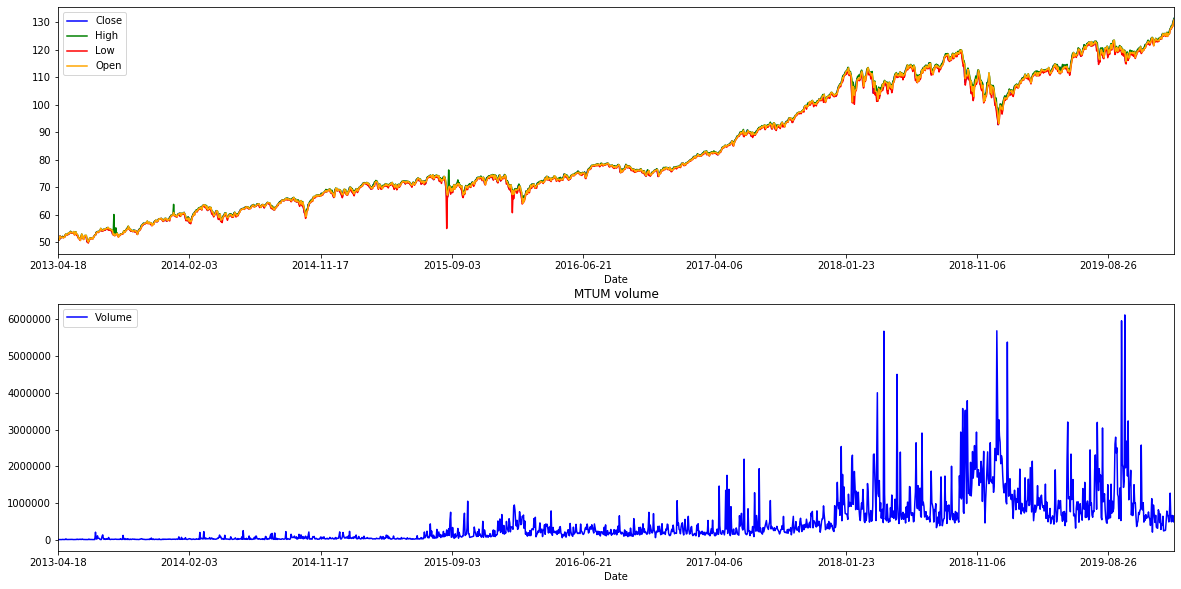

In [8]:
# Plots the price (Close, High, Low and Open data series). In comparisson, it also includes the volume signal.
plot_mtum(mtum_df)

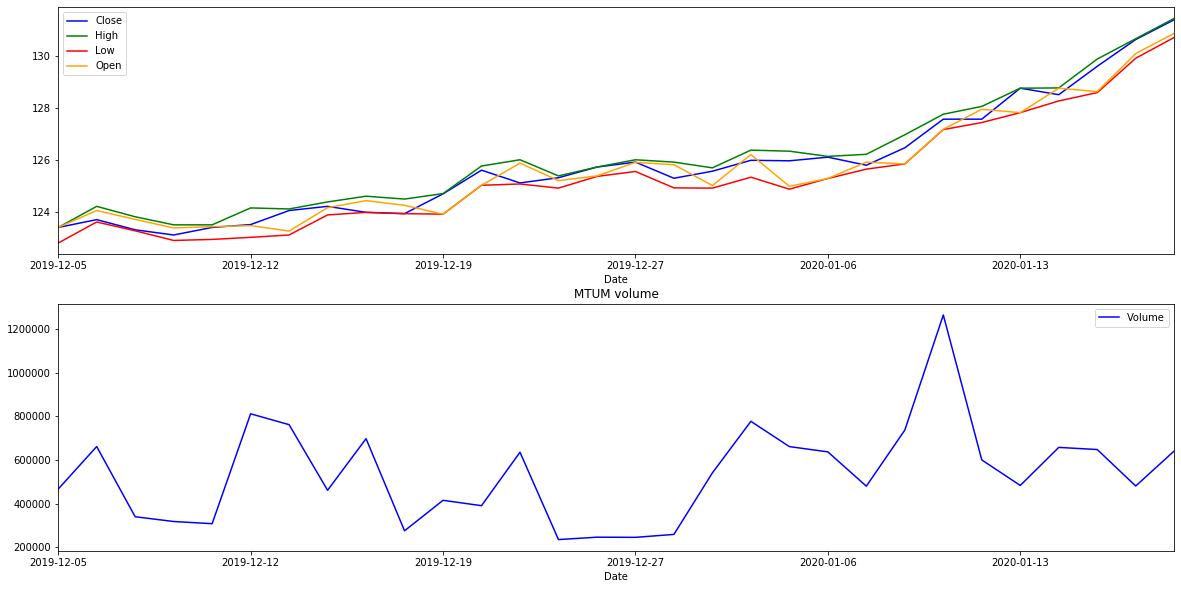

In [9]:
# Plots the price for the last 30 days just to better understand the evolution of all the variables.
plot_mtum(mtum_df.tail(30))

**Conclusiones**

El dataset mtum es un dataset de serie temporal diaria que contiene los precios de apertura, cierre, maximo y minimo además del volumen operado de iShares Edge MSCI USA Momentum Factor ETF (ver https://www.blackrock.com/cl/productos/251614/ishares-msci-usa-momentum-factor-etf).

El dataset no posee NA / missing data y contine aproximadamente 1700 registros, que son el resultado del registro diario desde el 18 de abril de 2013 al 13 de enero de 2020 (con la excepcion de los dáas en que el ETF no operó - feriados, fines de semana, etc.).

### 2.- Ingenieria de features

#### 2.1 - ¿Necesita corregir valores faltantes?

In [10]:
# Checks missing data.
dates_df = mtum_df[['Date']].copy()
dates_df.Date = pd.to_datetime(dates_df['Date'], infer_datetime_format=True)
dates_df['DayOfWeek'] = dates_df.Date.dt.dayofweek
# Evaluates if there are weekend days. There are not.
dates_df.loc[dates_df['DayOfWeek'].isin([5, 6])].shape

(0, 2)

In [11]:
# As an example of a holiday, we look for July 4th (Independence day in the US). 2019/07/04 was a Thursday.
dates_df.loc[dates_df['Date'] == datetime.date(year=2019, month=7, day=4)].shape

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


(0, 2)

**Conclusión**

Los días que no están son porque que el fondo no operó por lo que no tiene sentido tratarlos. En otras palabras, el dataset esta purgado. No se han detectado datos erróneos por estar fuera de rango. Así, se determina que no hay que corregir por valores faltantes.

#### 2.2 - ¿Qué preprocesamiento necesitan las variables para los algoritmos de ensamble que va a utilizar? 

Referencias:
- https://towardsdatascience.com/financial-machine-learning-part-0-bars-745897d4e4ba
- Advances in Financial Machine Learning, seccion: 2.3
- https://github.com/BlackArbsCEO/Adv_Fin_ML_Exercises/blob/master/notebooks/Tick%2C%20Volume%2C%20Dollar%20Volume%20Bars.ipynb

Evaluamos la ocurrencia de valores fuera de rango en las series, con el fin de remover las entradas. Outliers en estos casos serán valores fuera de rango entre series de precios.

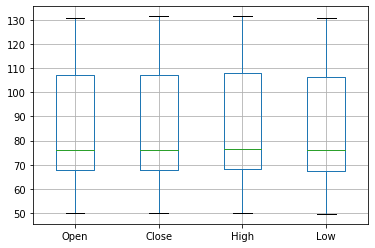

In [12]:
mtum_df.boxplot(['Open', 'Close', 'High', 'Low'])

En el gráfico anterior se puede ver que no existen valores extremos imposibles.

### 3.- Metalabelling

#### 3.1- Momentum con medias de 50 y 200 dias

Existen muchas formas de implementar momentum, una de estas es con los cruces entre las medias de 50 y 200 días como en el ejercicio
[3.4 del López de Prado](https://github.com/BlackArbsCEO/Adv_Fin_ML_Exercises/blob/master/notebooks/Labeling%20and%20MetaLabeling%20for%20Supervised%20Classification.ipynb).

Momemtum es una estrategia de inversión que analiza en base a la serie temporal de precios de un activo y las señales de promedio de dos frecuencias distintas, los cruces entre estas para generar señales de compra y venta. Estos eventos serán posteriormente utilizados por el algoritmo de ML para que la proporción de dinero que se apueste sea la óptima.

La siguiente iteración pretende variar los lapsos de los promedios (tanto de alta como de baja frecuencia) con el fin de generar una cantidad suficiente de eventos que permita entrenar el modelo de ML posterior que prediga el tamaño de la inversión.

/home/agustin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


 0    1699
-1       1
 1       1
Name: BetEWMA, dtype: int64

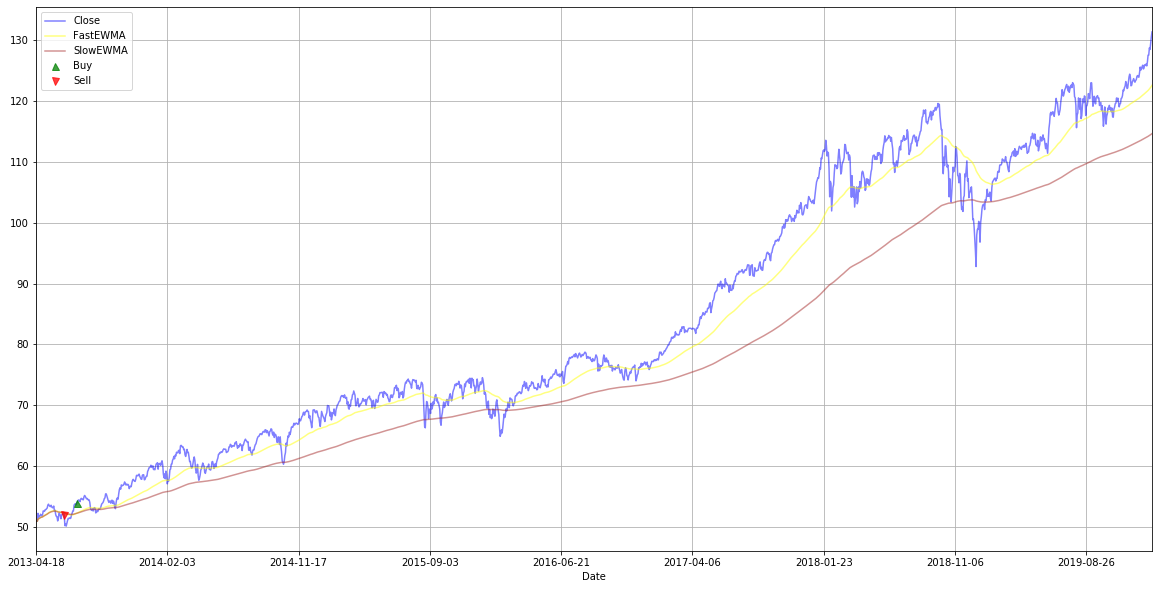

In [13]:
mtum_df = create_bet_signal_fast_slow_ewma(mtum_df, 'Close', 50, 200)
plot_ewma_bet_signals(mtum_df)
mtum_df['BetEWMA'].value_counts()

 0    1695
-1       3
 1       3
Name: BetEWMA, dtype: int64

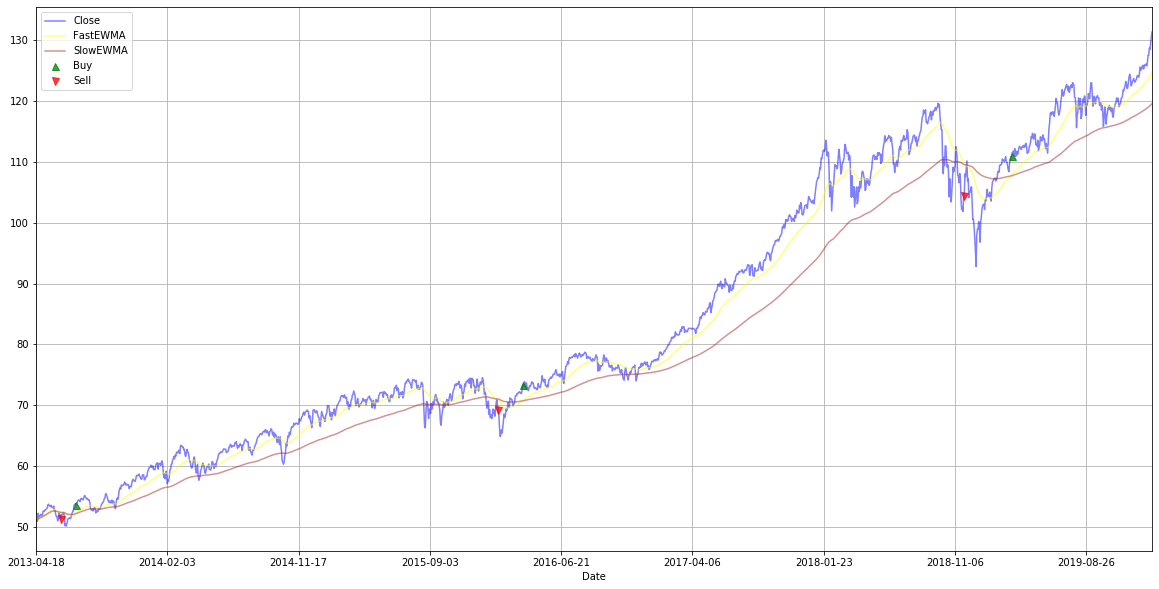

In [14]:
mtum_df = create_bet_signal_fast_slow_ewma(mtum_df, 'Close', 25, 100)
plot_ewma_bet_signals(mtum_df)
mtum_df['BetEWMA'].value_counts()

 0    1691
-1       5
 1       5
Name: BetEWMA, dtype: int64

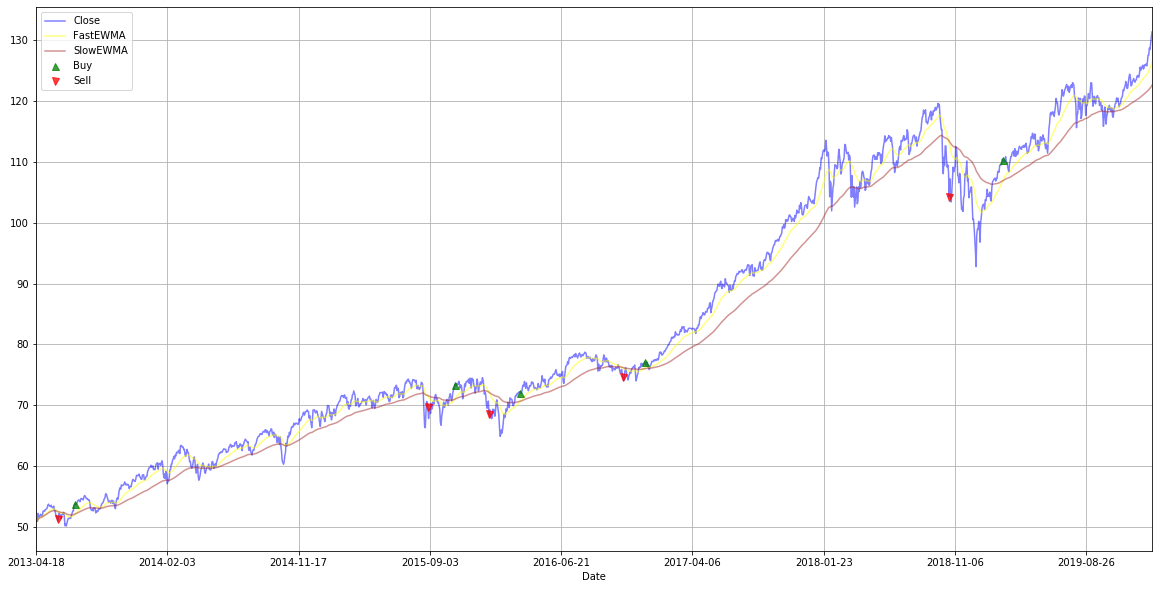

In [15]:
mtum_df = create_bet_signal_fast_slow_ewma(mtum_df, 'Close', 14, 50)
plot_ewma_bet_signals(mtum_df)
mtum_df['BetEWMA'].value_counts()

 0    1589
-1      56
 1      56
Name: BetEWMA, dtype: int64

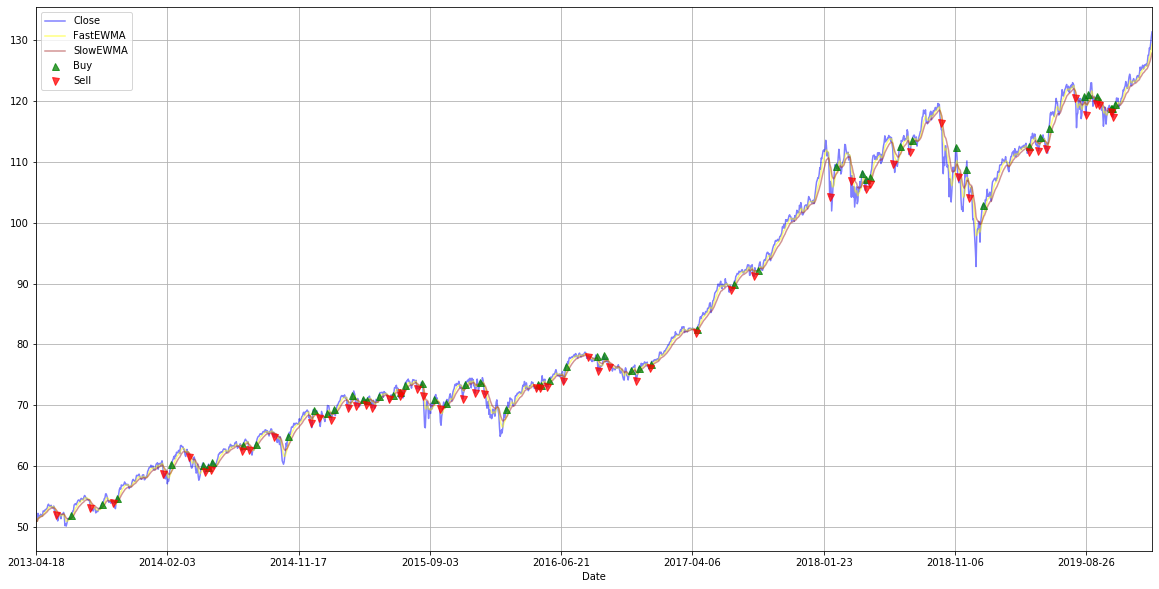

In [16]:
mtum_df = create_bet_signal_fast_slow_ewma(mtum_df, 'Close', 3, 7)
plot_ewma_bet_signals(mtum_df)
mtum_df['BetEWMA'].value_counts()

Observamos que con 3 y 7 días, obtenemos en total 112 apuestas a comprar y vender, lo cual permite realizar un análisis (aunque con pocos valores a priori).

#### 3.2- Predicciones

Una vez obtenido el side del bet sobre el ETF MTUM en base a los cruces de las medias móviles puede armar el label a predecir usando los snippets 3.6 y 3.7 del López de Prado. 

In [17]:
fast_ewma = compute_ewma(mtum_df.Close, FAST_EWMA_NUM_DAYS)
slow_ewma = compute_ewma(mtum_df.Close, SLOW_EWMA_NUM_DAYS)
up = get_up_cross(fast_ewma, slow_ewma)
down = get_down_cross(fast_ewma, slow_ewma)
side_up = pd.Series(1, index=up.index)
side_down = pd.Series(-1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()

In [18]:
dailyVol = getDailyVol(mtum_df.Close)
tEvents = getTEvents(mtum_df.Close, h=dailyVol.mean())
t1 = addVerticalBarrier(tEvents, mtum_df.Close, numDays=NUM_DAYS)
target=dailyVol

events = getEvents(mtum_df.Close, tEvents, PT_SL, target, MIN_RET, t1=t1, side=side)
events_side = events.dropna().side
labels = getBinsNew(events, mtum_df.Close, t1).dropna()

Xx = pd.merge_asof(labels, side.to_frame().rename(columns={0:'side'}),
                   left_index=True, right_index=True, direction='forward')
Xx

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:420: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


,ret,bin,side
54,0.012900,1.0,1
83,0.001508,1.0,-1
124,0.025018,1.0,1
194,0.013295,1.0,-1
206,0.014264,1.0,1
...,...,...,...
1614,-0.011292,0.0,-1
1620,0.006288,1.0,-1
1638,0.007695,1.0,-1
1640,-0.013713,0.0,-1


#### 3.3- Obtener el size del bet

Procedemos entonces a utilizar los labels anteriores que permitan entrenar un RandomForest. Posteriormente, vamos a utilizar ese valor para calcular el valor de la predicción para obtener el tamaño de la apuesta.

In [19]:
X, y, X_train, X_test, y_train, y_test = train_test_samples(events, labels, TEST_SIZE)

              precision    recall  f1-score   support

         0.0       0.59      0.62      0.61        16
         1.0       0.60      0.56      0.58        16

    accuracy                           0.59        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.59      0.59      0.59        32



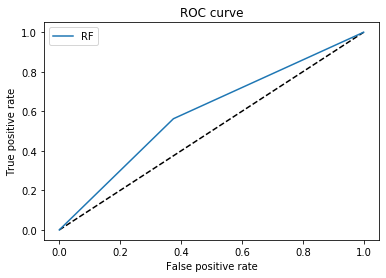

In [20]:
rf = getRandomForest()
rf.fit(X_train, y_train)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
plotROC(y_test, y_pred)

In [21]:
getSignal(X, 0.1, y_pred_rf, y_pred, 2.)

array([ 0.3002326, -0.       ,  0.3002326, -0.       , -0.       ,
       -0.       ,  0.3002326, -0.       , -0.       ,  0.3002326,
       -0.       , -0.       ,  0.3002326,  0.3002326,  0.3002326,
       -0.       , -0.       ,  0.3002326,  0.3002326, -0.       ,
        0.3002326, -0.       ,  0.3002326,  0.3002326,  0.3002326,
       -0.       ,  0.3002326, -0.       , -0.       , -0.       ,
       -0.       ,  0.3002326])

#### 3.5- Optimizacion del Random Forest

Recuerde hacer la optimización de hiper parámetros del random forest
tales como la profundidad máxima de cada árbol.

Referencias:
- https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead

Nota: se debe colocar en True la variable RUN_RANDOM_FOREST_OPTIMIZATION

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.1min finished


              precision    recall  f1-score   support

         0.0       0.59      0.62      0.61        16
         1.0       0.60      0.56      0.58        16

    accuracy                           0.59        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.59      0.59      0.59        32



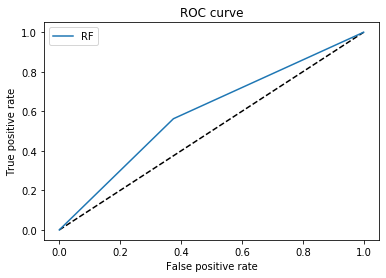

In [22]:
rf = getOptimizedRandomForest()
rf.fit(X_train, y_train)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
plotROC(y_test, y_pred)

Como podemos ver, no se produce mejora alguna al optimizar los hiperparámetros del modelo.

### 3.- Diferenciación Fraccionaria

#### 3.1- Necesidad de Diferenciación

Toda serie que se busca transformar en estacionaria debería diferenciarse fraccionariamente. De esta forma, puede alcanzarse una transformación que cumpla los requisitos de estacionaridad, con la menor pérdida de memoria posible, lo que permite la aplicación conservar su poder predictivo para la posterior aplicación de algoritmos de ML. La única excepción a esta regla es el caso de las series cointegradas.

#### 3.2- Orden Óptimo de Diferenciación
Se recomienda un orden de diferenciación fraccionaria d = 0.5 ya que es aquel valor que hace que la serie tenga la menor pérdida de memoria posible, sin comprometer el requerimiento de estacionaridad. (A un nivel de confianza del 95%, el valor crítico del estadístico ADF = -2.863). Vemos en la figura (y en los resultados _testMinFFD), que ese valor de de estadístico se alcanza para un 0.4 < d < 0.5. (Cruzes línea punteada y azul).

Validamos a su vez la recomendación de diferenciar fraccionariamente la serie, ya que 0< d* << 1, lo que implica que en caso de no haber diferenciado la misma, se habría perdido mucha memoria.

Finalmente, se observa también que para dicho punto, la correlación entre la serie original (d=0) y la diferenciada es alta, lo cual confirma que el procedimiento fue exitoso en alcanzar la estacionalidad sin un alto sacrificio de memoria.

,adfStat,pVal,lags,nObs,95% conf,corr
0.00,-0.686522,8.502098e-01,1.0,1699.0,-2.863243,1.000000
0.05,-0.667179,8.550688e-01,1.0,1695.0,-2.863247,0.999990
0.10,-0.781125,8.246038e-01,1.0,1692.0,-2.863250,0.999914
0.15,-0.913525,7.834857e-01,1.0,1690.0,-2.863252,0.999703
0.20,-1.037721,7.392589e-01,1.0,1689.0,-2.863253,0.999303
0.25,-1.277085,6.395897e-01,1.0,1688.0,-2.863254,0.998558
0.30,-1.530640,5.183035e-01,1.0,1688.0,-2.863254,0.997484
0.35,-1.846766,3.575029e-01,1.0,1688.0,-2.863254,0.995787
0.40,-2.142385,2.278164e-01,1.0,1689.0,-2.863253,0.993848
0.45,-2.616126,8.970985e-02,1.0,1689.0,-2.863253,0.990115


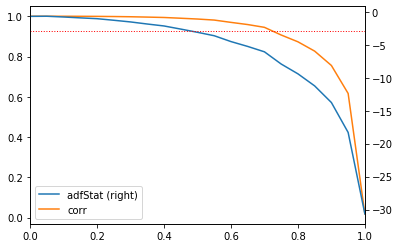

In [23]:
threshold = 0.01
pValue = 0.05

close_df = mtum_df.filter(['Close'], axis= 1)
close_df.index = mtum_df['Date'].astype('datetime64[ns]')

minFFD = plotMinFFD(close_df, threshold)
minFFD

In [24]:
d = abs(minFFD['pVal'] - pValue).idxmin()
d

0.5

In [25]:
fracDiff = fracDiff_FFD(series=close_df[['Close']], d=d, thres=5e-5)
fracDiff.index = mtum_df.index

In [26]:
# Obtains the crossing events of the 3-7 EWMA curves.
fast_ewma = compute_ewma(fracDiff.Close, FAST_EWMA_NUM_DAYS)
slow_ewma = compute_ewma(fracDiff.Close, SLOW_EWMA_NUM_DAYS)

up = get_up_cross(fast_ewma, slow_ewma)
down = get_down_cross(fast_ewma, slow_ewma)

side_up = pd.Series(1, index=up.index)
side_down = pd.Series(-1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()

In [27]:
# Gets the daily volatility of prices to serve events as a threshold.
dailyVol = getDailyVol(fracDiff.Close)
tEvents = getTEvents(fracDiff.Close, h=dailyVol.mean())
# Gets the vertical barrier events.
t1 = addVerticalBarrier(tEvents, fracDiff.Close, numDays=NUM_DAYS)
target=dailyVol
# Computes the events.
events = getEvents(fracDiff.Close, tEvents, PT_SL, target, MIN_RET, t1=t1, side=side)
events_side = events.dropna().side
# Gets the labels for the events.
labels = getBinsNew(events, fracDiff.Close, t1).dropna()
Xx = pd.merge_asof(labels, side.to_frame().rename(columns={0:'side'}),
                   left_index=True, right_index=True, direction='forward')
Xx

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:420: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


,ret,bin,side
351,-0.240668,0.0,-1
360,-0.443788,0.0,-1
381,-0.369301,0.0,1
401,-0.112910,0.0,1
422,-0.389546,0.0,1
...,...,...,...
1668,-0.416359,0.0,-1
1672,-0.057261,0.0,1
1677,-0.109757,0.0,1
1681,-0.051802,0.0,1


In [28]:
def evaluate(X,y,clf):
    from sklearn import metrics
    # The random forest model by itself
    y_pred_rf = clf.predict_proba(X)[:, 1]
    y_pred = clf.predict(X)
    fpr_rf, tpr_rf, _ = metrics.roc_curve(y, y_pred_rf)
    print(metrics.classification_report(y, y_pred))

    plt.figure(figsize=(9,6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_rf, tpr_rf, label='clf')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    
    
def evaluate_multi(X_test, y_test, fit, n_classes=3):
    """
    adapted from:
        https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    """
    from sklearn import metrics
    
    print(metrics.classification_report(y_test, fit.predict(X_test)))
    
    try:
        y_score = fit.decision_function(X_test)
    except:
        y_score = fit.predict_proba(X_test)
        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(12,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    lw=2
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Multiclass Bins')
    plt.legend(loc="lower right")
    plt.show()

In [29]:
# Generates the Xs and Ys to learn the size.
X, y, X_train, X_test, y_train, y_test = train_test_samples(events, labels, TEST_SIZE, binarize=False)

In [30]:
rf = getOptimizedRandomForest()
rf.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/home/agustin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

/home/agustin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        52
         1.0       0.00      0.00      0.00        13

    accuracy                           0.80        65
   macro avg       0.40      0.50      0.44        65
weighted avg       0.64      0.80      0.71        65



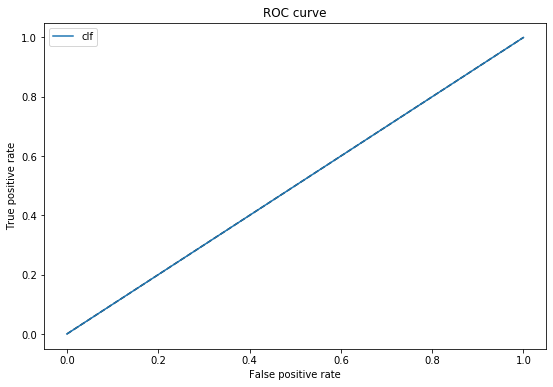

In [31]:
evaluate(X_test, y_test, rf)

**Conclusión**

El método no mejora la performance del modelo. Por otro lado, es interesante destacar la incongruencia propuesta en la referencia bibliográfica que utiliza un indicador de volatilidad de retornos previamente diferenciados por lo que se estaría analizando una segunda derivada o derivada mixta (una entera que aplica getTEvents() sumado a la diferenciación fraccionaria del método). Este método es descartado del análisis en lo que resta de este trabajo.

### 4- Sample weights

#### 4.1- ¿Tiene sentido ponderar las observaciones?

Si, tiene sentido. Los eventos pueden tener una duración tal que genere concurrencia de los mismos. La concurrencia se la entiende como superposición de la duración de eventos consecutivos. Esto deriva en varios problemas, como ser:

- Duplicación de la información.
- Sobrestimación y sobreajuste en el modelo producto de la duplicación de la información.
- Los retornos excesivos contienen información importante, tal vez mayor que los retornos cercanos a la media.
- Los mercados son adaptativos, por lo que la información reciente es más relevante que la antigua. Por esta razón, es importante tener en cuenta el factor tiempo en la ponderación de la serie de eventos.
- Puede haber correlación cruzada entre distintas clases de eventos (por ejemplo: serie de precios vs. evolución de yield de bonos soberanos) a los que nos interese ponderar explícitamente en caso que ocurriera alguna anomalía (crisis repentina, guerras, etc.).

#### 4.2- ¿Cuáles ponderadores utilizaría? ¿Por uniqueness? ¿Por el tamaño del retorno?

En función de los motivos comentados anteriormente, se desprende que en el análisis cobra relevancia relevar por:

- Uniqueness: al poseer una ventana de barrera vertical tal que genere que los eventos puedan tener concurrencia, es importante ponderar que tanta unicidad tienen dichos eventos entre sí.
- Tamaño de retorno: retornos significativos respecto a alguna medida de volatilidad deben ser sobrepesados con el fin de resaltar la información del movimiento de precios que conllevan.
- Influencia cross-evento ya que es una serie que modela un mercado: con el fin de reducir el span de influencia de eventos uno con el otro, buscamos afectarlos temporalmente con el fin de disminuir la influencia de muestras pasadas.

#### 4.5- ¿Mejoran los resultados al ponderar?

In [32]:
def evaluate(X,y,clf):
    from sklearn import metrics
    # The random forest model by itself
    y_pred_rf = clf.predict_proba(X)[:, 1]
    y_pred = clf.predict(X)
    fpr_rf, tpr_rf, _ = metrics.roc_curve(y, y_pred_rf)
    print(metrics.classification_report(y, y_pred))

    plt.figure(figsize=(9,6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_rf, tpr_rf, label='clf')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    
    
def evaluate_multi(X_test, y_test, fit, n_classes=3):
    """
    adapted from:
        https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    """
    from sklearn import metrics
    
    print(metrics.classification_report(y_test, fit.predict(X_test)))
    
    try:
        y_score = fit.decision_function(X_test)
    except:
        y_score = fit.predict_proba(X_test)
        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(12,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    lw=2
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Multiclass Bins')
    plt.legend(loc="lower right")
    plt.show()

In [33]:
# Obtains the crossing events of the 3-7 EWMA curves.
fast_ewma = compute_ewma(mtum_df.Close, FAST_EWMA_NUM_DAYS)
slow_ewma = compute_ewma(mtum_df.Close, SLOW_EWMA_NUM_DAYS)

up = get_up_cross(fast_ewma, slow_ewma)
down = get_down_cross(fast_ewma, slow_ewma)

side_up = pd.Series(1, index=up.index)
side_down = pd.Series(-1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()

In [34]:
# Gets the daily volatility of prices to serve events as a threshold.
dailyVol = getDailyVol(mtum_df.Close)
tEvents = getTEvents(mtum_df.Close, h=dailyVol.mean())
# Gets the vertical barrier events.
t1 = addVerticalBarrier(tEvents, mtum_df.Close, numDays=NUM_DAYS)
target=dailyVol
# Computes the events.
events = getEvents(mtum_df.Close, tEvents, PT_SL, target, MIN_RET, t1=t1, side=side)

# Gets the labels for the events.
labels = getBinsNew(events, mtum_df.Close, t1).dropna()
Xx = pd.merge_asof(labels, side.to_frame().rename(columns={0:'side'}),
                   left_index=True, right_index=True, direction='forward')
Xx

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:420: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


,ret,bin,side
54,0.012900,1.0,1
83,0.001508,1.0,-1
124,0.025018,1.0,1
194,0.013295,1.0,-1
206,0.014264,1.0,1
...,...,...,...
1614,-0.011292,0.0,-1
1620,0.006288,1.0,-1
1638,0.007695,1.0,-1
1640,-0.013713,0.0,-1


In [35]:
# Applies uniqueness, return weights and time decay to events.
numCoEvents = mpNumCoEvents(mtum_df.Close.index, events['t1'], events.index)
numCoEvents = numCoEvents.loc[~numCoEvents.index.duplicated(keep='last')]
numCoEvents = numCoEvents.reindex(mtum_df.Close.index).fillna(0)

out=pd.DataFrame()
out['tW'] = mpSampleTW(events['t1'], numCoEvents, events.index)

out['w'] = mpSampleW(events['t1'], numCoEvents, mtum_df.Close, events.index)
out['w'] *= getTimeDecay(out['tW'], clfLastW=CLF_LAST_W)
out['w'] *= out.shape[0]/out['w'].sum()
averageUniqueness = out.mean()[0]

In [36]:
# Generates the Xs and Ys to learn the size.
# TODO: use the function!
X = events.dropna().side.values.reshape(-1,1)
y = labels.bin.values
y = label_binarize(y, classes=[-1,1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished
/home/agustin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.60      0.56      0.58        16

    accuracy                           0.59        32
   macro avg       0.59      0.59      0.59        32
weighted avg       0.59      0.59      0.59        32



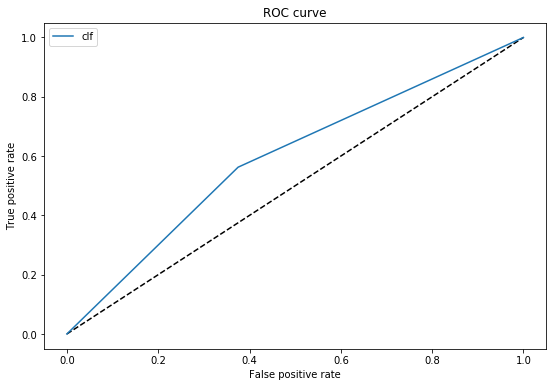

In [37]:
rf = getOptimizedRandomForest(max_samples=averageUniqueness)
fit = rf.fit(X_train,y_train)
evaluate(X_test, y_test, fit)

**Conclusión**

Se puede observar una leve mejoría en la performance frente a los anteriores métodos tras ejecutar de forma conjunta la optimización con el agregado del average uniqueness al RandomForest.

### 6- Cross validation

#### 6.1- ¿Mejoran los resultados al hacer purged k-fold y embargo en relación a la validación tradicional en series de tiempo?

In [38]:
# Obtains the crossing events of the 3-7 EWMA curves.
fast_ewma = compute_ewma(mtum_df.Close, FAST_EWMA_NUM_DAYS)
slow_ewma = compute_ewma(mtum_df.Close, SLOW_EWMA_NUM_DAYS)

up = get_up_cross(fast_ewma, slow_ewma)
down = get_down_cross(fast_ewma, slow_ewma)

side_up = pd.Series(1, index=up.index)
side_down = pd.Series(-1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()

# Gets the daily volatility of prices to serve events as a threshold.
dailyVol = getDailyVol(mtum_df.Close)
tEvents = getTEvents(mtum_df.Close, h=dailyVol.mean())
# Gets the vertical barrier events.
t1 = addVerticalBarrier(tEvents, mtum_df.Close, numDays=NUM_DAYS)
target=dailyVol
# Computes the events.
events = getEvents(mtum_df.Close, tEvents, PT_SL, target, MIN_RET, t1=t1, side=side)

# Gets the labels for the events.
labels = getBinsNew(events, mtum_df.Close, t1).dropna()
Xx = pd.merge_asof(labels, side.to_frame().rename(columns={0:'side'}),
                   left_index=True, right_index=True, direction='forward')

# Applies uniqueness, return weights and time decay to events.
numCoEvents = mpNumCoEvents(mtum_df.Close.index, events['t1'], events.index)
numCoEvents = numCoEvents.loc[~numCoEvents.index.duplicated(keep='last')]
numCoEvents = numCoEvents.reindex(mtum_df.Close.index).fillna(0)

out=pd.DataFrame()
out['tW'] = mpSampleTW(events['t1'], numCoEvents, events.index)

out['w'] = mpSampleW(events['t1'], numCoEvents, mtum_df.Close, events.index)
out['w'] *= getTimeDecay(out['tW'], clfLastW=CLF_LAST_W)
out['w'] *= out.shape[0]/out['w'].sum()
averageUniqueness = out.mean()[0]

# Generates the Xs and Ys to learn the size.
# TODO: use the function!
X = events.dropna().side.values.reshape(-1,1)
y = labels.bin.values

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:420: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


/home/agustin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


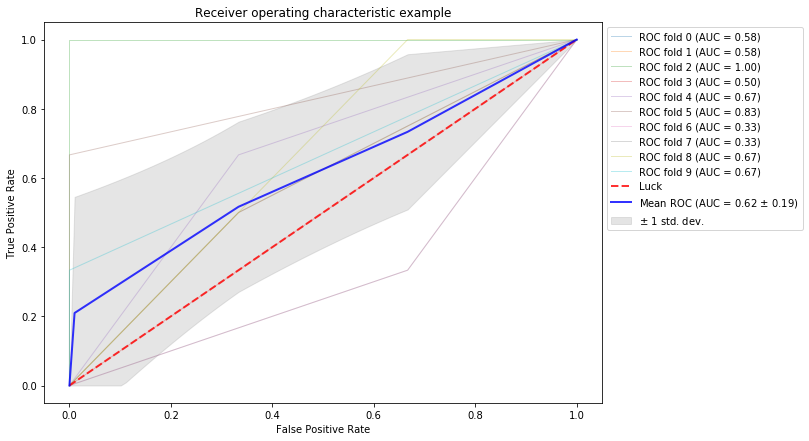

In [39]:
skf = StratifiedKFold(n_splits=CV, shuffle=False, random_state=RANDOM_STATE) 
rfc = getOptimizedRandomForest(max_samples=averageUniqueness)
crossValPlot(skf, rfc, X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.2min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.1min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.2min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.1min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.1min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.1min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


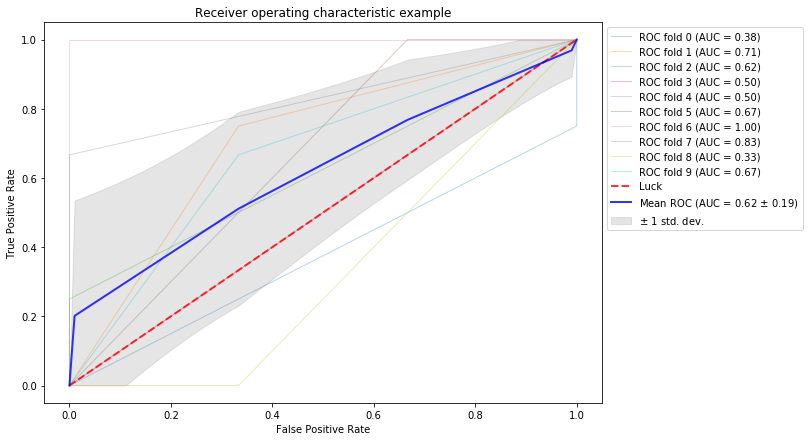

In [40]:
# Note: shuffle is set to True. We expect leakage and an increase of performance in the model.
skf = StratifiedKFold(n_splits=CV, shuffle=True, random_state=RANDOM_STATE)
rfc = getOptimizedRandomForest(max_samples=averageUniqueness)
crossValPlot(skf, rfc, X, y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.7min finished


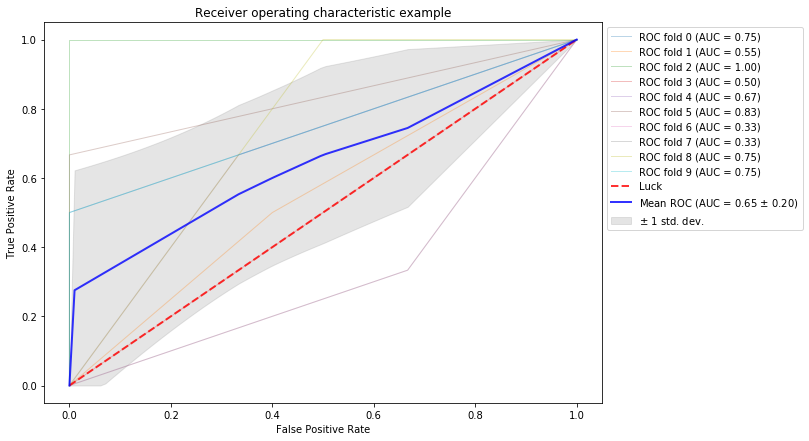

In [41]:
# When enabling feature importance, we should leave them all here.
X2 = events.dropna().drop(['trgt', 't1'], axis=1)
y2 = labels['bin']
tt1 = events.dropna().drop(['trgt', 'side'], axis=1)

# Now with embargo...
skf = PurgedKFold(n_splits=CV, t1=tt1['t1'], pctEmbargo=PCT_EMBARGO)
rfc = getOptimizedRandomForest(max_samples=averageUniqueness)
crossValPlot2(skf, rfc, X2, y2)

In [42]:
scores = cvScore(rfc,X2,y2,out['w'],t1=tt1['t1'],pctEmbargo=PCT_EMBARGO,cv=CV)
scores = pd.Series(scores).sort_values()
scores

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


7   -0.866047
8   -0.839220
0   -0.755436
1   -0.746196
3   -0.729657
6   -0.659633
5   -0.628453
4   -0.623123
9   -0.545867
2   -0.520020
dtype: float64

              precision    recall  f1-score   support

         0.0       0.58      0.66      0.61        29
         1.0       0.67      0.59      0.62        34

    accuracy                           0.62        63
   macro avg       0.62      0.62      0.62        63
weighted avg       0.62      0.62      0.62        63



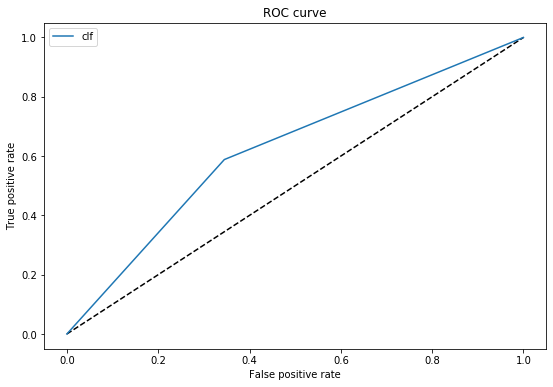

In [43]:
evaluate(X2, y2, rfc)

**Conclusión**

Nuevamente, experimentamos una leve mejora en la predicción al sumar purged k-folds como método de training del RandomForest. 

#### 6.2- ¿Esperaría que el shuffle mejore o empeore los resultados sobre el train set?

Se esperan mejores resultados y como se ve, la performance se mantiene.

Desde un punto de vista conceptual, esto se produce por el leakage de la mezcla.
Por otra parte, el hecho de usar purged k-fold mejora (estadisticamente no es significativo, pero el cambio en decimales se ajusta a la tendencia teórica) debido a la inclusión del embargo.

### 7.- Feature importance

In [44]:
# Adds features to the data frame with different horizons.
num_days_windows = [3, 5, 13, 34, 55]

mtum_df['log_ret'] = np.log(mtum_df['Close']).diff()

# RSI at different windows.
add_rsi_to(mtum_df, num_days_windows)

# Momentum (over momentum)
add_momentum_to(mtum_df, num_days_windows)
    
# Volatility
add_volatility_to(mtum_df, num_days_windows)
    
# Autocorrelation
window_autocorr = 34
autocorr_orders = [1, 2, 3]
add_autocorrelation_to(mtum_df, window_autocorr, autocorr_orders)


In [45]:
# Loads the treasury bonds yields at 2 and 10 years from the US. 
# After that, we play a bit with the difference and add it to the data frame.
treas_bonds_df = pd.read_csv(TREAS_US_BONDS_PATH)
display(treas_bonds_df.head(), treas_bonds_df.shape)

con_mtum_dates = pd.to_datetime(mtum_df.Date).isin(pd.to_datetime(treas_bonds_df.Date))
con_mtum_as_dates = mtum_df.Date.loc[con_mtum_dates]
df = treas_bonds_df.loc[pd.to_datetime(treas_bonds_df.Date).isin(con_mtum_as_dates)]

mtum_df['LongToShortTB'] = 0
mtum_df['LongToShortTB'].loc[con_mtum_dates] = df['10 Yr'] - df['2 Yr']

,Date,2 Yr,10 Yr
0,04/18/13,0.24,1.72
1,04/19/13,0.24,1.73
2,04/22/13,0.24,1.72
3,04/23/13,0.23,1.74
4,04/24/13,0.23,1.73


(1689, 3)

/home/agustin/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
print(mtum_df)

            Date        Open        High         Low       Close   Adj Close  \
0     2013-04-18   50.919998   50.919998   50.919998   50.919998   46.707516   
1     2013-04-19   50.919998   50.919998   50.919998   50.919998   46.707516   
2     2013-04-22   50.919998   50.919998   50.919998   50.919998   46.707516   
3     2013-04-23   52.220001   52.220001   52.220001   52.220001   47.899956   
4     2013-04-24   51.700001   51.700001   51.560001   51.560001   47.294567   
...          ...         ...         ...         ...         ...         ...   
1696  2020-01-13  127.809998  128.750000  127.809998  128.750000  128.750000   
1697  2020-01-14  128.750000  128.759995  128.259995  128.500000  128.500000   
1698  2020-01-15  128.619995  129.869995  128.580002  129.589996  129.589996   
1699  2020-01-16  130.080002  130.649994  129.899994  130.619995  130.619995   
1700  2020-01-17  130.860001  131.429993  130.699997  131.380005  131.380005   

      Volume    FastEWMA    SlowEWMA  B

#### 7.1- ¿Podemos entender qué features son relevantes en el metalabeling?

In [47]:
# Obtains the crossing events of the 3-7 EWMA curves.
fast_ewma = compute_ewma(mtum_df.Close, FAST_EWMA_NUM_DAYS)
slow_ewma = compute_ewma(mtum_df.Close, SLOW_EWMA_NUM_DAYS)

up = get_up_cross(fast_ewma, slow_ewma)
down = get_down_cross(fast_ewma, slow_ewma)

side_up = pd.Series(1, index=up.index)
side_down = pd.Series(-1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()

# Gets the daily volatility of prices to serve events as a threshold.
dailyVol = getDailyVol(mtum_df.Close)
tEvents = getTEvents(mtum_df.Close, h=dailyVol.mean())
# Gets the vertical barrier events.
t1 = addVerticalBarrier(tEvents, mtum_df.Close, numDays=NUM_DAYS)
target=dailyVol
# Computes the events.
events = getEvents(mtum_df.Close, tEvents, PT_SL, target, MIN_RET, t1=t1, side=side)

# Gets the labels for the events.
labels = getBinsNew(events, mtum_df.Close, t1).dropna()
Xx = pd.merge_asof(labels, side.to_frame().rename(columns={0:'side'}),
                   left_index=True, right_index=True, direction='forward')

# Applies uniqueness, return weights and time decay to events.
numCoEvents = mpNumCoEvents(mtum_df.Close.index, events['t1'], events.index)
numCoEvents = numCoEvents.loc[~numCoEvents.index.duplicated(keep='last')]
numCoEvents = numCoEvents.reindex(mtum_df.Close.index).fillna(0)

out=pd.DataFrame()
out['tW'] = mpSampleTW(events['t1'], numCoEvents, events.index)

out['w'] = mpSampleW(events['t1'], numCoEvents, mtum_df.Close, events.index)
out['w'] *= getTimeDecay(out['tW'], clfLastW=CLF_LAST_W)
out['w'] *= out.shape[0]/out['w'].sum()
averageUniqueness = out.mean()[0]

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:420: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


In [48]:
cont = labels.copy(deep=True)
cont['w'] = 1. / cont.shape[0]
cont['t1'] = labels.index

trnsX = mtum_df.iloc[cont['t1'].values].copy(deep=True)
trnsX = trnsX.drop(['Date'], axis=1)
trnsX = trnsX.dropna()

# Given that trnsX might have dropped rows, we need to re-calibrate cont.
cont = cont.loc[cont.index[cont.index.isin(trnsX.index)]]

##### 7.1.1- Mean decrease in impurity

In [57]:
# Computes a base model to run the feature importance evaluation.
skf = PurgedKFold(n_splits=CV, t1=tt1['t1'], pctEmbargo=PCT_EMBARGO)
rfc = getRandomForest(n_estimator=N_ESTIMATORS, oob_score=True, max_samples=averageUniqueness)
fit =rfc.fit(X=trnsX, y=cont['bin'], sample_weight=cont['w'].values)

In [58]:
mdi_imp, mdi_oob, mdi_oos = featImportance(trnsX, cont, rfc, fit, cv=CV, pctEmbargo=PCT_EMBARGO,
                                           scoring='accuracy', method='MDI')

In [59]:
print(mdi_imp)
print(mdi_oob)
print(mdi_oos)

                   mean       std
Open           0.033137  0.000708
High           0.026103  0.000589
Low            0.033380  0.000963
Close          0.033835  0.000959
Adj Close      0.026798  0.000759
Volume         0.031412  0.000923
FastEWMA       0.024845  0.000693
SlowEWMA       0.035700  0.000882
BetEWMA        0.029723  0.001041
log_ret        0.038100  0.001322
rsi_3          0.030494  0.000840
rsi_5          0.034824  0.000965
rsi_13         0.030628  0.001288
rsi_34         0.028787  0.000946
rsi_55         0.038403  0.001001
mom_3          0.045997  0.000616
mom_5          0.035079  0.000718
mom_13         0.038392  0.000892
mom_34         0.040261  0.001093
mom_55         0.041394  0.001226
vol_3          0.034258  0.000963
vol_5          0.040009  0.001320
vol_13         0.033375  0.000977
vol_34         0.038356  0.000905
vol_55         0.036382  0.000801
autocorr_1     0.033010  0.000754
autocorr_2     0.039628  0.000962
autocorr_3     0.034632  0.001165
LongToShortTB 

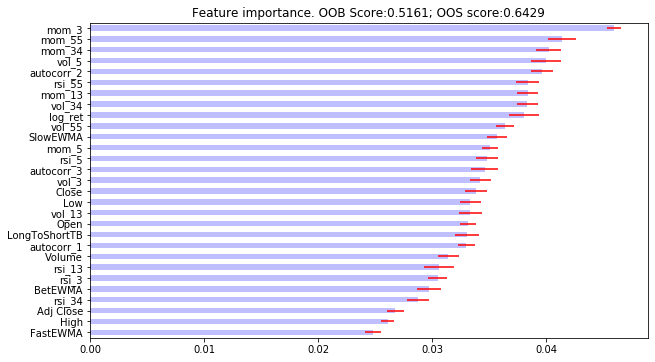

In [60]:
plot_feature_importance(mdi_imp, mdi_oob, mdi_oos)

In [61]:
less_imp_features_mdi = mdi_imp[mdi_imp['mean'] < mdi_imp['mean'].values.mean()].index.values
less_imp_features_mdi

array(['FastEWMA', 'High', 'Adj Close', 'rsi_34', 'BetEWMA', 'rsi_3',
       'rsi_13', 'Volume', 'autocorr_1', 'LongToShortTB', 'Open',
       'vol_13', 'Low', 'Close', 'vol_3'], dtype=object)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.6min finished


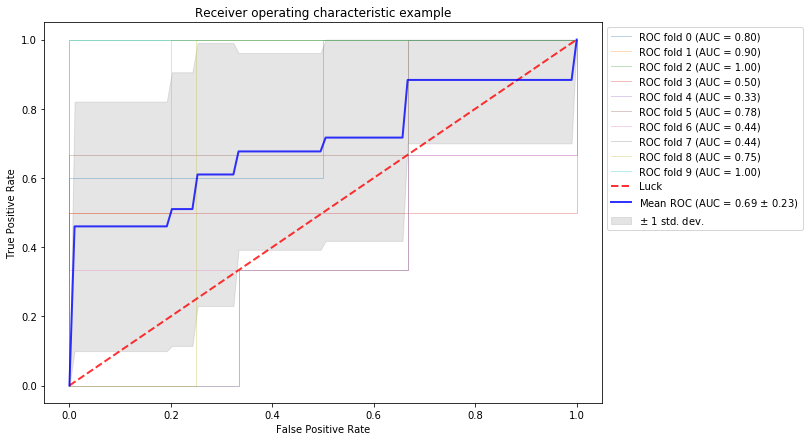

In [63]:
# Computes with just the most important features.
X = trnsX.drop(less_imp_features_mdi, axis=1)

y = labels['bin']
y = y.loc[y.index[y.index.isin(X.index)]]

tt1 = events.dropna().drop(['trgt', 'side'], axis=1)
tt1 = tt1.loc[tt1.index[tt1.index.isin(X.index)]]

skf = PurgedKFold(n_splits=CV, t1=tt1['t1'], pctEmbargo=PCT_EMBARGO)
rfc = getOptimizedRandomForest(max_samples=averageUniqueness)
crossValPlot2(skf, rfc, X, y)

**Conclusion**

Vemos que al realizar el análisis de feature importance, sólo logramos aumentar el desvío estandar de la MEAN ROC, no mejorando significativamente la performance del modelo.

##### 7.1.2- Feature permutation

In [64]:
# Computes a base model to run the feature importance evaluation.
skf = PurgedKFold(n_splits=CV, t1=tt1['t1'], pctEmbargo=PCT_EMBARGO)
rfc = getRandomForest(n_estimator=N_ESTIMATORS, oob_score=True, max_samples=averageUniqueness)
fit =rfc.fit(X=trnsX, y=cont['bin'], sample_weight=cont['w'].values)

In [65]:
mda_imp, mda_oob, mda_oos = featImportance(trnsX, cont, rfc, fit, cv=CV, pctEmbargo=PCT_EMBARGO,
                                           scoring='accuracy', method='MDA')

In [66]:
print(mda_imp)
print(mda_oob)
print(mda_oos)

                   mean       std
Open           0.033333  0.033333
High           0.000000  0.000000
Low            0.000000  0.000000
Close          0.000000  0.000000
Adj Close      0.000000  0.000000
Volume         0.000000  0.000000
FastEWMA       0.000000  0.000000
SlowEWMA       0.000000  0.000000
BetEWMA        0.000000  0.000000
log_ret        0.083333  0.056928
rsi_3          0.033333  0.033333
rsi_5          0.083333  0.056928
rsi_13         0.033333  0.033333
rsi_34         0.033333  0.033333
rsi_55         0.000000  0.000000
mom_3         -0.100000  0.100000
mom_5          0.033333  0.033333
mom_13        -0.066667  0.108866
mom_34        -0.050000  0.116667
mom_55        -0.033333  0.116003
vol_3          0.066667  0.044444
vol_5          0.000000  0.000000
vol_13         0.000000  0.000000
vol_34         0.050000  0.050000
vol_55         0.033333  0.033333
autocorr_1     0.033333  0.033333
autocorr_2     0.083333  0.056928
autocorr_3     0.000000  0.000000
LongToShortTB 

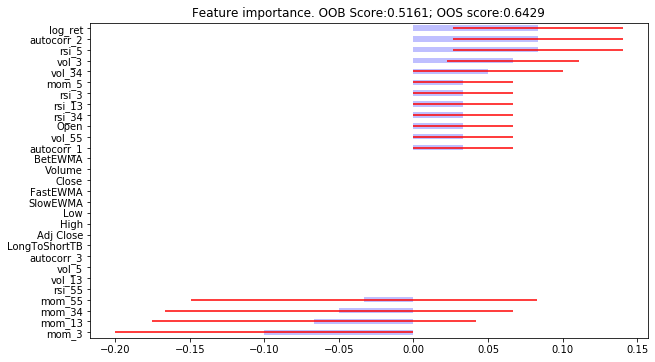

In [67]:
plot_feature_importance(mda_imp, mda_oob, mda_oos)

**Conclusiones**

Los valores a descartar por MDA son bastante similares que los arrojados por MDI, por lo que incrementamos la confianza en los resultados obtenidos.

#### 7.2- Puede usar como referencia "Factor Premia and Factor Timing: A Century of Evidence" (Ilmanen, Israel, Moskowitz, Thapar, and Wang, 2019) para analizar de qué variables parece depender la performance de momentum

El estudio realiza un análisis exhaustivo respecto de varias estrategias de inversión a lo largo del tiempo con información sobre múltiples activos. Particularmente, para momentum el estudio no es concluyente sobre ninguna de las métricas con evidencia estadística. Por lo tanto, incorporar un activo o un set de activos al data set no genera valor justificado a menos que se realice un análisis en particular sobre la información subyacente en ese set de títulos y el set de activos (o simplemente portfolio) sobre el cual momentum se aplica.

Aun así, al incorporar información de bonos a dos y a diez años soberanos de USA, estamos incorporando información de mercado agregada que pondera actividad y expectativas propias de USA y el mundo.  

### 8.- Backtesting

#### 8.1- ¿Cómo es la performance de su estrategia de momentum con el size óptimo?

In [68]:
# Simulates the base strategy of purchasing and selling MTUM at  the beggining of times and then at the end.
es_base = EvaluateStrategy(CASH_REF, CASH_REF, 0, mtum_df.Close.values[0])
es_base.buy_all(mtum_df.Close.values[0])
es_base.sell_all(mtum_df.Close.values[-1])
es_base.get_stats()

{'initial_valuation': 1000000.0,
 'r': 1.5801258868863275,
 'net_profit': 1580125.8868863275,
 'cash_ref': 1000000.0,
 'cash': 2580125.8868863275,
 'security': 0.0,
 'price': 131.380005,
 'valuation': 2580125.8868863275,
 'n_trades': 2}

In [69]:
# Computes with just the most important features.
X = trnsX.drop(less_imp_features_mdi, axis=1)

y = labels['bin']
y = y.loc[y.index[y.index.isin(X.index)]]

tt1 = events.dropna().drop(['trgt', 'side'], axis=1)
tt1 = tt1.loc[tt1.index[tt1.index.isin(X.index)]]

sample_weights = pd.Series(data=out[out.index.isin(X.index)].w.values, index=X.index.values, name='sample_weights')

In [70]:
# Just moves forward the model and evaluates the result.
skf = PurgedKFold(n_splits=CV, t1=tt1['t1'], pctEmbargo=PCT_EMBARGO)
rfc = getOptimizedRandomForest(max_samples=averageUniqueness)
rfc.fit(X, y, sample_weight=sample_weights.values)

# The random forest model by itself
y_pred_rf = rfc.predict_proba(X)[:, 1]
y_pred = rfc.predict(X)

bet_size = pd.Series(data=getSignal(X, 0.1, y_pred_rf, y_pred_rf, 2.), index=X.index.values, name='bet_size')

environment_df = pd.DataFrame({'price': mtum_df.Close.iloc[X.index].values, 
                               'side': events[events.index.isin(X.index.values)].side.values,
                               'bet_size': bet_size.values})

# Simulates the strategy with the entire time but using the trained model.
es_model = EvaluateStrategy(CASH_REF, CASH_REF, 0, environment_df.price.values[0])
es_model.bulk_trade(environment_df, enable_log=False) # Applies the trade model...
es_model.sell_all(mtum_df.Close.values[-1]) # Sells everything the last day
es_model.get_stats()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.5min finished


{'initial_valuation': 1000000.0,
 'r': 0.7818553983402422,
 'net_profit': 781855.3983402422,
 'cash_ref': 1000000.0,
 'cash': 1781855.3983402422,
 'security': 0.0,
 'price': 131.380005,
 'valuation': 1781855.3983402422,
 'n_trades': 63}

#### 8.2- ¿Logramos superar la performance del ETF MTUM?

Como se puede ver en base a los datos historicos, no se pudo mejorar la peformance del ETF MTUM.

### 9.- Conclusiones

El presente trabajo se basa en el libro Financial Analytics de Marcos Lopez de Prado. En particular, desde el comienzo del libro hasta el módulo de backtesting. A lo largo de las secciones del presente trabajo se iteró en la formulación de un modelo de trading sobre un ETF que basa su estrategia de confección de portafolio en momentum. Dicha estrategia presenta algunas particularidades históricas, en promedio funciona, pero los fundamentos son aun discutidos. 

El siguiente listado enumera los pasos de uno de los métodos explicados en el libro de referencia:

**Método 1**
- A partir de un activo, generar las series de información (bars) que ofrezcan una muestra cuando un cuanto de información de algún tipo (precio, volumen, volatilidad, número de ventas, etc.) esté disponible.
- Encontrar eventos relevantes a partir de la serie anterior y/o varias series en conjuntos ofreciendo una señal de compra y venta. En el caso particular de este trabajo la estrategia de generación es momentum.
- Realizar un estudio de la unicidad de cada una de las muestras y ponderar las muestras por dicha característca.
- Agregado de variables explicativas y no, sumado a un posterior descarte de aquellas que no sumen información al modelo.
- A partir de la volatilidad en retornos, generar un modelo de ML que permita estimar el tamaño de la apuesta indicada previamente.
- Analizar el modelo con datos históricos mediante distintas técnicas.

**Método 2**
- A partir de un activo, generar las series de información (bars) que ofrezcan una muestra cuando un cuanto de información de algún tipo (precio, volumen, volatilidad, número de ventas, etc.) esté disponible.
- Realizar un estudio de estacionariedad de la serie con el fin de remover tendencias que no aporten información en el nivel óptimo.
- Encontrar eventos relevantes a partir de la serie anterior y/o varias series en conjuntos ofreciendo una señal de compra y venta. En el caso particular de este trabajo la estrategia de generación es momentum.
- Realizar un estudio de la unicidad de cada una de las muestras y ponderar las muestras por dicha característca.
- Agregado de variables explicativas y no, sumado a un posterior descarte de aquellas que no sumen información al modelo. 
- A partir de la volatilidad en retornos, generar un modelo de ML que permita estimar el tamaño de la apuesta indicada previamente.
- Analizar el modelo con datos históricos mediante distintas técnicas.

Como se comentó en el inciso de diferenciación fraccionaria, pertinente del método 2, el autor realiza una doble diferenciación sobre los precios. Por un lado está la diferenciación fraccionaria y por otro lado está el ajuste de eventos por volatilidad. Vemos que esto es inconsistente en términos de magnitud analizada ya que se está derivando más que una vez la serie de precios para obtener el indicador que alimenta posteriormente el modelo. Esta ha sido la razón por la que se prosiguió el análisis con el método 1.

Es importante destacar varios aspectos relevantes del presente modelo obtenido. La cantidad de eventos, con una serie diaria no es suficiente para entrenar el modelo. Con una serie de datos más prolongada obtendríamos más eventos con los que podríamos entrenar el modelo de forma más precisa. Los cortes para un cross validation resaltan este efecto y el embargo lo empeora aun más. La performance del modelo obtenida es pobre como se puede ver en los resultados y las simulaciones de walk forward posteriores. Aun así, el método no queda descartado sino que se entiende su performance en el contexto de las limitaciones y requisitos a la que se lo somete.

Un detalle propio de este trabajo que difiere de los modelos planteados en la bibliografía de referencia es que se utilizan los mismos clasificadores y modelos de RandomForest a lo largo de todo el trabajo para destacar la variación e impacto de las variables y parámetros externos a ellos generan sobre el resultado final.

Notas sobre backtesting:

- Walk-forward no fue implementado porque la cantidad de samples disponibles para entrenar el modelo es tan baja que realizar particiones para analizar la performance del model con más o menos datos y su progresivo ajuste resulta prácticamente imposible (sumará un puñado de muestras, menos que diez si al menos usamos la mitad de las muestras para entrenar el modelo base).
- De forma similar con el método convolucional.

Notas sobre PurgedKFold:

- El embargo se lo mantuvo en 0.01 como la bibliografía propone. No se realiza una optimización sobre este valor.
- En realidad, la optimización sobre el embargo no es trivial ni delegada a un algoritmo de ML sino que requiere conocer la naturaleza de las señales intervinientes y que tanto impacto autocorrelacional tienen sumada la importancia relativa de cada una.
- Para el valor de muestras que se dispone, el valor de 1% resulta ser lo suficientemente pequeño para que no tenga efecto en la estrategia. 